In [2]:
#CONDA ENV base (python 3.9.12)
#Import packages
#---------------------------------------
import sys
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pygtftk as gtftk
import pyranges as pr

#Import your modules
#---------------------------------------
import te_rna_f as ter
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.9.12 (main, Apr  5 2022, 06:56:58) \n[GCC 7.5.0]'

# Load metadata




In [179]:
# For non-TSO analysis, Male, 10 timepoints (Glu + Gaba)
meta = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/PEC_RNAmeta.csv')


In [180]:
male_GABA = meta[np.array(meta['sex'] == 'Male') & np.array(meta['Cell Type'] == 'GABA')]
male_GLU = meta[np.array(meta['sex'] == 'Male') & np.array(meta['Cell Type'] == 'GLU')]


In [181]:
zipped_pairs = zip(male_GLU['AGEYEARS'], male_GLU['Sample ID'])
z = [x for x in sorted(zipped_pairs)]
ind = z[::3][2:]
names = np.asarray(ind)[:,1]
ind, names

([(4, '6032'),
  (11, '6285'),
  (15, '1823'),
  (17, '5643'),
  (30, 'Hct16HECA028'),
  (35, '1277'),
  (39, '1241'),
  (58, '1848'),
  (62, '5326'),
  (77, '5744')],
 array(['6032', '6285', '1823', '5643', 'Hct16HECA028', '1277', '1241',
        '1848', '5326', '5744'], dtype='<U21'))

In [182]:
#GLU DATA
male_GLU_df = male_GLU.iloc[[np.where(names[i] == male_GLU['Sample ID'])[0][0] for i in range(len(names))]]
male_GLU_df

,Sample ID,Cell Type,RIN,Bulk tissue RNA RIN#,RNAseq Library Prep Date Date,batch,Brain Bank,DISORDER,CDEATHOFF,AGEYEARS,AGEDAYS,sex,race,Brain PH,PMI Hours,sample,period
89,6032,GLU,6.5,7,1/27/2022,10,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Head & Neck injuries,4,51.0,Male,White,6.34,25.0,6032-GLU,earlychildhood
91,6285,GLU,3.4,5.5,2/16/2022,14,University of Maryland Brain and Tissue Bank(U...,NaN,Traumatic arrest/blunt trauma (ped. vs vehicle),11,25.0,Male,White,7.02,8.0,6285-GLU,latechildhood
16,1823,GLU,6.1,7,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,15,128.0,Male,White,5.55,18.0,1823-GLU,adolescence
71,5643,GLU,5.5,7.8,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cardiac Arrhythmia due to conduction system,17,123.0,Male,Black or African-American,ND,14.0,5643-GLU,adolescence
109,Hct16HECA028,GLU,4.2,8.2,2/16/2022,14,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Hypertensive and Atherosclerotic Cardiovascula...,30,279.0,Male,Black or African-American,6.58,20.8,Hct16HECA028-GLU,adulthood
9,1277,GLU,5.9,8.9,3/10/2022,17,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,ASCVD (Arteriosclerotic Cardiovascular Disease),35,27.0,Male,White,5.47,20.0,1277-GLU,adulthood
93,1241,GLU,4.4,7.9,1/27/2022,10,MSSM Brain Bank,Unaffected Control,manner of death: natural,39,NaN,Male,White,7,20.6,1241-GLU,adulthood
18,1848,GLU,5.2,7.8,11/29/2021,6,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,HASCVD,58,49.0,Male,Black or African-American,6.02,9.0,1848-GLU,lateadulthood
55,5326,GLU,5.1,7.3,2/9/2022,13,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Torso Injuries,62,107.0,Male,White,6.02,6.0,5326-GLU,lateadulthood
73,5744,GLU,3.4,9.5,3/25/2022,20,Human Brain and Spinal Fluid Resource Center (...,Unaffected Control,Undetermined,77,NaN,Male,White,6.6,22.0,5744-GLU,lateadulthood


In [99]:
#GABA DATA
male_GABA_df = male_GABA.iloc[[np.where(names[i] == male_GABA['Sample ID'])[0][0] for i in range(len(names))]]
male_GABA_df

,Sample ID,Cell Type,RIN,Bulk tissue RNA RIN#,RNAseq Library Prep Date Date,batch,Brain Bank,DISORDER,CDEATHOFF,AGEYEARS,AGEDAYS,sex,race,Brain PH,PMI Hours,sample,period
88,6032,GABA,6.6,7,1/27/2022,10,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Head & Neck injuries,4,51.0,Male,White,6.34,25.0,6032-GABA,earlychildhood
90,6285,GABA,4.4,5.5,2/16/2022,14,University of Maryland Brain and Tissue Bank(U...,NaN,Traumatic arrest/blunt trauma (ped. vs vehicle),11,25.0,Male,White,7.02,8.0,6285-GABA,latechildhood
15,1823,GABA,5.8,7,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,15,128.0,Male,White,5.55,18.0,1823-GABA,adolescence
70,5643,GABA,5.4,7.8,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cardiac Arrhythmia due to conduction system,17,123.0,Male,Black or African-American,ND,14.0,5643-GABA,adolescence
108,Hct16HECA028,GABA,4.2,8.2,2/16/2022,14,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Hypertensive and Atherosclerotic Cardiovascula...,30,279.0,Male,Black or African-American,6.58,20.8,Hct16HECA028-GABA,adulthood
8,1277,GABA,5.6,8.9,3/10/2022,17,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,ASCVD (Arteriosclerotic Cardiovascular Disease),35,27.0,Male,White,5.47,20.0,1277-GABA,adulthood
92,1241,GABA,4.8,7.9,1/27/2022,10,MSSM Brain Bank,Unaffected Control,manner of death: natural,39,NaN,Male,White,7,20.6,1241-GABA,adulthood
17,1848,GABA,5.2,7.8,11/29/2021,6,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,HASCVD,58,49.0,Male,Black or African-American,6.02,9.0,1848-GABA,lateadulthood
54,5326,GABA,4.3,7.3,2/9/2022,13,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Torso Injuries,62,107.0,Male,White,6.02,6.0,5326-GABA,lateadulthood
72,5744,GABA,3.4,9.5,3/25/2022,20,Human Brain and Spinal Fluid Resource Center (...,Unaffected Control,Undetermined,77,NaN,Male,White,6.6,22.0,5744-GABA,lateadulthood


# Calculate evolutionary age of TEs

In [ ]:
#Compute evolutionary age
ev_df = te.read_rmsk('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/hg38.fa.out')


In [108]:
ev_df

,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repStart,repEnd,repLeft,id,repClass,repFamily,length,age
0,463,13.0,6.0,17.0,chr1,10001,10468,248945954,+,(TAACCC)n,1,471,0,1,Simple_repeat,None,470,0.013114
1,3612,114.0,215.0,13.0,chr1,10469,11447,248944975,-,TAR1,399,1712,483,2,Satellite,telo,1229,0.123656
2,484,251.0,132.0,0.0,chr1,11505,11675,248944747,-,L1MC5a,2382,395,199,3,LINE,L1,196,0.305600
3,239,294.0,19.0,10.0,chr1,11678,11780,248944642,-,MER5B,74,104,1,4,DNA,hAT-Charlie,103,0.373185
4,318,230.0,37.0,0.0,chr1,15265,15355,248941067,-,MIR3,119,143,49,5,SINE,MIR,94,0.274683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520113,744,38.0,11.0,25.0,chrY,57216407,57217320,10095,+,(TTAGGG)n,1,924,0,4607726,Simple_repeat,None,923,0.038996
5520114,55,105.0,43.0,0.0,chrY,57217321,57217413,10002,+,(GT)n,1,97,0,4607727,Simple_repeat,None,96,0.113117
5520115,2240,119.0,0.0,10.0,chrY_KI270740v1_random,229,540,36700,-,AluY,0,311,3,4607728,SINE,Alu,308,0.129576
5520116,1433,141.0,40.0,4.0,chrY_KI270740v1_random,625,867,36373,-,L1PA7,2,6152,5901,4607729,LINE,L1,251,0.156191


In [202]:
#Subset LINEs/SINEs - order by evolutionary age
l_unq = line['gene_id'].unique()
s_unq = sine['gene_id'].unique()
ev_dict = {'family':[], 'element':[], 'age':[]} #empty dict

In [203]:
for l in l_unq:
    curr_df = ev_df[ev_df['repName'] == l]
    ev_dict['family'].append('LINE')
    ev_dict['element'].append(l)
    ev_dict['age'].append(np.mean(curr_df['age'].values))

In [204]:
for l in s_unq:
    curr_df = ev_df[ev_df['repName'] == l]
    ev_dict['family'].append('SINE')
    ev_dict['element'].append(l)
    ev_dict['age'].append(np.mean(curr_df['age'].values))


In [206]:
ev_df_s = pd.DataFrame(ev_dict)
#save dataframe to csv
ev_df_s.to_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv', index=False)

# Filter for TSO



### Calculate TSS dispersion after TSO filtering


In [3]:
tss = pr.read_bed('/cndd3/dburrows/DATA/te/gtf/annotations/refTSS/refTSS_v3.3_human_coordinate.hg38.bed')

In [4]:
tss

,Chromosome,Start,End,Name,Score,Strand,ThickStart,ThickEnd,ItemRGB
0,chr1,36521,36538,hg_234905.1,1,+,36529,36530,"255,255,0"
1,chr1,207042,207057,hg_233845.1,1,+,207049,207050,"255,255,0"
2,chr1,629191,629220,hg_1.1,1,+,629205,629206,"255,255,0"
3,chr1,629259,629269,hg_2.1,1,+,629264,629265,"255,255,0"
4,chr1,629635,629651,hg_235997.1,1,+,629643,629644,"255,255,0"
...,...,...,...,...,...,...,...,...,...
224689,chrY,24776485,24776499,hg_244143.1,1,-,24776492,24776493,"255,255,0"
224690,chrY,24813392,24813393,hg_244144.1,1,-,24813392,24813393,"255,255,0"
224691,chrY,25051999,25052000,hg_244147.1,1,-,25051999,25052000,"255,255,0"
224692,chrY,26671129,26671136,hg_201298.1,1,-,26671132,26671133,"255,255,0"


In [124]:
import glob
glob.glob('/cndd3/dburrows/DATA/te/rna/aligned.subset.TSO-filt/5326-GLU' + '/*Tra*.bam')[0]

'/cndd3/dburrows/DATA/te/rna/aligned.subset.TSO-filt/5326-GLU/Aligned.toTranscriptome.out.bam'

In [114]:
glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*trim.*.gz')

['/cndd3/dburrows/DATA/te/rna/fastq.subset/1823-GABA-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1241-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5744-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1848-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6285-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1277-GABA-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1848-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6285-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6032-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5643-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1823-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5326-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5326-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5744-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subse

### Calculate positions of TSO

In [36]:
import glob
R1_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R2_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R1_l, R2_l

(['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'],
 ['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'])

In [37]:
def read_cat(path):
    with open(path) as f:
        prac = f.read().splitlines()
    v = np.asarray(str.split(prac[0])).astype(int)
    return(v)


In [38]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


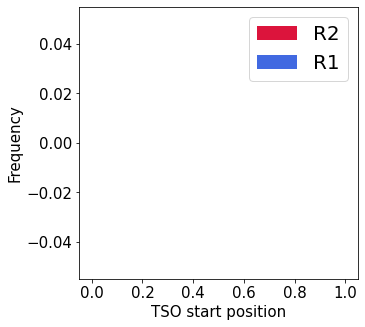

In [103]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_cat, bins = 50, color='crimson', label='R2')
plt.hist(R1_cat, bins = 50, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

In [49]:
import glob
R1_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R2_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R2*txt')
R1_l, R2_l

(['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'],
 ['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R2-trim-pos.txt'])

In [40]:
def read_cat(path):
    with open(path) as f:
        prac = f.read().splitlines()
    v = np.asarray(prac).astype(int)
    return(v)


In [50]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


In [55]:
R1_cat, R2_cat

(array([100.,  11.,  38., ..., 100.,   0.,  47.]),
 array([ 75., 100., 100., ...,  78., 100., 100.]))

In [48]:
np.max(R1_cat)

100.0

In [60]:
R1_filt = 100 - R1_cat[R1_cat < R2_cat]
R2_filt = 100 - R2_cat[R2_cat < R1_cat]


In [56]:
R1_filt = 100 - R1_cat
R2_filt = 100 - R2_cat


In [59]:
R1_filt

array([  0.,  89.,  62., ...,   0., 100.,  53.])

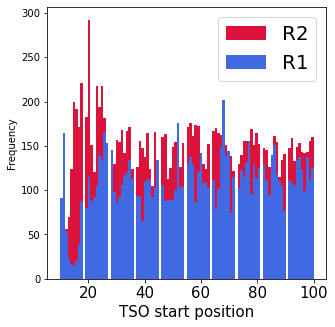

In [61]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_filt, bins = 100, color='crimson', label='R2')
plt.hist(R1_filt, bins = 100, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 20})
#plt.savefig(s_fig + '/TSO_pos_cutadapt.svg', transparent=True)
plt.show()

In [ ]:
R1_filt = 100 - R1_cat[R1_cat < 100]
R2_filt = 100 - R2_cat[R2_cat < 100]

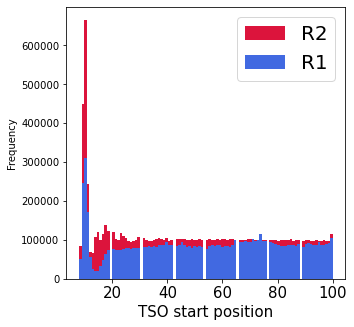

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_filt, bins = 100, color='crimson', label='R2')
plt.hist(R1_filt, bins = 100, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 20})
plt.savefig(s_fig + '/TSO_pos_cutadapt.svg', transparent=True)
plt.show()

In [ ]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


In [ ]:
line_unq = np.unique(line['gene_id'])
ev_line = ev_df[ev_df['repClass']=='LINE']
ev_line


### Calculate proportions of TSO

In [ ]:
# For non-TSO analysis, Male, 10 timepoints (Glu + Gaba)
df = pd.read_csv('/cndd3/dburrows/DATA/te/rna/fastq.subset.TSO/TSO_counts.csv')


In [ ]:
df

,ID,counts,total reads,normalised counts
0,6032-GLU,5393484,461783892,0
1,6032-GABA,4086032,342269132,0
2,6285-GLU,6126792,502425144,0
3,6285-GABA,7227780,613945456,0
4,1823-GLU,0,302078012,0
5,1823-GABA,4499944,406219576,0
6,5643-GLU,3905756,344266196,0
7,5643-GABA,5161144,445277700,0
8,HCK16HECA028-GLU,4857624,397996640,0
9,HCK16HECA028-GABA,4850800,407171776,0


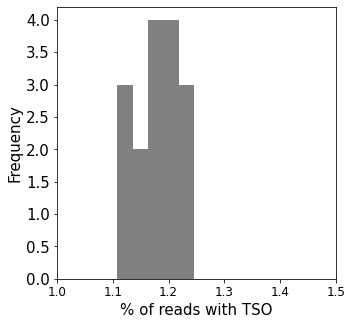

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
data = np.asarray(df['counts']/df[' total reads']) 
data[data>0]
plt.hist(data[data>0]*100, bins=5, color='grey')
plt.xlabel('% of reads with TSO', fontsize=15)
plt.xlim(1,1.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.savefig(s_fig + '/TSO_freq.svg', transparent=True)
plt.show()



In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
plt.hist(R2_cat, bins = 50, color='crimson', label='R2')
plt.hist(R1_cat, bins = 50, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

# Filter by 5' alignment

### Generate full-length TE bed file

In [2]:
# Load in data

#rmsk file
rmsk = pr.read_gtf('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/rmsk.hg38.gtf', as_df=True)

In [3]:
rmsk

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
0,chr1,hg38_rmsk,exon,100000000,100000637,11325,-,.,L1M2,L1M2_dup229,L1,LINE
1,chr1,hg38_rmsk,exon,10000001,10000239,1760,+,.,AluSx3,AluSx3_dup157,Alu,SINE
2,chr1,hg38_rmsk,exon,100000743,100002612,11325,-,.,L1M2,L1M2_dup230,L1,LINE
3,chr1,hg38_rmsk,exon,10000250,10000566,2225,+,.,AluSx,AluSx_dup700,Alu,SINE
4,chr1,hg38_rmsk,exon,100002612,100002913,1799,-,.,AluJr,AluJr_dup3513,Alu,SINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4693506,chrY,hg38_rmsk,exon,9998087,9998438,1154,-,.,MLT1B,MLT1B_dup11187,ERVL-MaLR,LTR
4693507,chrY,hg38_rmsk,exon,9999718,9999778,228,-,.,MIR3,MIR3_dup51650,MIR,SINE
4693508,KI270740.1,hg38_rmsk,exon,228,540,2240,-,.,AluY,AluY_dup110742,Alu,SINE
4693509,KI270740.1,hg38_rmsk,exon,624,867,1433,-,.,L1PA7,L1PA7_dup13354,L1,LINE


In [4]:
#FILTER FOR LINEs
line = rmsk[rmsk['class_id'] == 'LINE']
print('Line families = ' + str(line['family_id'].unique()))
print('Here we only look at L1 and L2 families')
l1 = line[line['family_id']=='L1']
l2 = line[line['family_id']=='L2']
print('Total L1 insertions in reference n = ' + str(len(l1)))
print('Total L2 insertions in reference n = ' + str(len(l2)))

#Remove truncated insertions by length
l1_co = 5500  #define minimum length for l1 insertions
l2_co = 2500 #define minimum length for l2 insertions

l1_full = l1[l1['End']-l1['Start'] > l1_co]
l2_full = l2[l2['End']-l2['Start'] > l2_co]

assert np.max(l1_full['End']-l1_full['Start']) > l1_co,  'L1 elements not correctly filtered'
assert np.max(l2_full['End']-l2_full['Start']) > l2_co,  'L2 elements not correctly filtered'
print ('Retained L1 insertions = ' + str(len(l1_full)) + ' ,  Truncated L1 insertions removed = ' + str(len(l1)-len(l1_full)))
print ('Retained L2 insertions = ' + str(len(l2_full)) + ' ,  Truncated L2 insertions removed = ' + str(len(l2)-len(l2_full))) 

Line families = ['L1' 'L2' 'CR1' 'RTE-Bo.B' 'RTE-X' 'Penelope' 'Dong-R4' 'RTE-BovB']
Here we only look at L1 and L2 families
Total L1 insertions in reference n = 1001410
Total L2 insertions in reference n = 474561
Retained L1 insertions = 8991 ,  Truncated L1 insertions removed = 992419
Retained L2 insertions = 46 ,  Truncated L2 insertions removed = 474515


In [5]:
#FILTER FOR SINEs
sine = rmsk[rmsk['class_id'] == 'SINE']
print('Sine families = ' + str(sine['family_id'].unique()))
print('Here we only look at Alu and MIR families')
alu = sine[sine['family_id']=='Alu']
mir = sine[sine['family_id']=='MIR']
print('Total Alu insertions in reference n = ' + str(len(alu)))
print('Total MIR insertions in reference n = ' + str(len(mir)))

#Remove truncated insertions by length
alu_co = 250  #define minimum length for alu insertions
mir_co = 250 #define minimum length for mir insertions

alu_full = alu[alu['End']-alu['Start'] > alu_co]
mir_full = mir[mir['End']-mir['Start'] > mir_co]

assert np.max(alu_full['End']-alu_full['Start']) > alu_co,  'Alu elements not corectly filtered'
assert np.max(mir_full['End']-mir_full['Start']) > mir_co,  'Mir elements not corectly filtered'
print ('Retained Alu insertions = ' + str(len(alu_full)) + ' ,  Truncated Alu insertions removed = ' + str(len(alu)-len(alu_full)))
print ('Retained Mir insertions = ' + str(len(mir_full)) + ' ,  Truncated Mir insertions removed = ' + str(len(mir)-len(mir_full)))

Sine families = ['Alu' 'MIR' '5S-Deu-L2']
Here we only look at Alu and MIR families
Total Alu insertions in reference n = 1238897
Total MIR insertions in reference n = 602609
Retained Alu insertions = 929241 ,  Truncated Alu insertions removed = 309656
Retained Mir insertions = 11456 ,  Truncated Mir insertions removed = 591153


In [6]:
# Convert into BED file
te_df = pd.concat([l1_full, l2_full, alu_full, mir_full]) #concatenate all TEs

# Only include 5' end of TE insertions for alignment 
n_start = 20 #Define the number of bps from the start of insertion to keep
te_bed = te_df.drop(['Source', 'Feature', 'Score', 'Frame'], axis=1) #re-order and remove some columns
te_bed = te_bed[['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']]


#split up the +/- strands in bed file
bed_plus = te_bed[te_bed["Strand"] == '+']
bed_plus['End'] = bed_plus['Start'] + n_start 

bed_minus = te_bed[te_bed["Strand"] == '-']
bed_minus['Start'] = bed_minus['End'] - n_start 

assert len(bed_plus) + len(bed_minus) == len(te_bed), 'Some insertions not assigned to +/- strands'
assert sum(bed_plus["Strand"] == "+") == len(bed_plus), 'Some non plus strands assigned to plus bed'
assert sum(bed_minus["Strand"] == "-") == len(bed_minus), 'Some non minus strands assigned to minus bed'

# # Write to bed file
bed_plus.to_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.bed', sep='\t', index=False, header=False)
bed_minus.to_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.bed', sep='\t', index=False, header=False)


/tmp/ipykernel_26953/4214644342.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_plus['End'] = bed_plus['Start'] + n_start
/tmp/ipykernel_26953/4214644342.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_minus['Start'] = bed_minus['End'] - n_start


### Filter BAM file to retain 5'ss aligned reads

In [ ]:
#CALCULATE NUMBER OF READS IN ENTIRE FILE
samtools view Aligned.sortedByCoord.out.bam | wc -l > total_reads.txt

In [ ]:
#BEWARY OF NAMING - PLUS AND MINUS!
#Split bam into forward and reverse strands - total time = 40 minutes (20m per strand)
#forward strand + 
samtools view -h -F 0x10 Aligned.sortedByCoord.out.bam > plus.bam

#reverse strand - 
samtools view -h -f 0x10 Aligned.sortedByCoord.out.bam > minus.bam

In [ ]:
#BEWARY OF NAMING - PLUS AND MINUS!
# Filter bam with bed file - total time = 20 minutes (10 minutes per strand)
#plus
samtools view -b -h -L /cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.sort.bed plus.bam > plus.5pfilt.bam
samtools index plus.5pfilt.bam

#minus
samtools view -b -h -L /cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.sort.bed minus.bam > minus.5pfilt.bam
samtools index minus.5pfilt.bam


In [ ]:
# Obtain UMI,flag, chromosome number and start positions
samtools view plus.5pfilt.bam  | cut -f -9 > plus.5pfilt.UMI.txt
samtools view minus.5pfilt.bam  | cut -f -9 > minus.5pfilt.UMI.txt


In [2]:
import pandas as pd
#BEWARY OF NAMING - PLUS AND MINUS!
#Read in required files for filtering
bed_pl = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.sort.bed', sep='\t', header=None)
bed_pl.columns =['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']
bed_mi = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.sort.bed',sep='\t', header=None)
bed_mi.columns =['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']

bam_pl = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/CZI/plus.5pfilt.bam', as_df=True) #CHANGE
bam_mi = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/CZI/minus.5pfilt.bam', as_df=True) #CHANGE
#Swap Start + End for minus strand
bam_mi['Start'], bam_mi['End'] = bam_mi['End'], bam_mi['Start']

#File checks
assert sum(bam_pl['Strand'] == '+') == len(bam_pl), 'Some non plus strands assigned to plus bam'
assert sum(bam_mi['Strand'] == '-') == len(bam_mi), 'Some non minus strands assigned to minus bam'
assert sum(bed_pl['Strand'] == '+') == len(bed_pl), 'Some non plus strands assigned to plus bed'
assert sum(bed_mi['Strand'] == '-') == len(bed_mi), 'Some non minus strands assigned to minus bed'


In [4]:
#Define + and - strand files
pl_pars = [bed_pl, bam_pl, '/cndd3/dburrows/DATA/te/rna/filt.prac/CZI/plus.5pfilt.UMI.txt', 'plus']
mi_pars = [bed_mi, bam_mi, '/cndd3/dburrows/DATA/te/rna/filt.prac/CZI/minus.5pfilt.UMI.txt', 'minus']
par_list = [pl_pars, mi_pars]


In [7]:
pd.options.mode.chained_assignment = None  # default='warn'
count_df = pd.DataFrame() #empty count matrix
bam_ll = [[],[]] #empty list of lists to store curr_bam indices

# Filter out reads that do not overlap with 5' portion of insertion
for x,par in enumerate(par_list):
    curr_bed = par[0]
    curr_bam = par[1]
    curr_name = pd.read_csv(par[2], sep='\t', header=None)
    assert len(curr_bam) == len(curr_name), 'Bam and UMI files not the same length'
    curr_bam['UMI']=curr_name[0].values #CHANGE CHANGE CHANGE 

    #Loop through each chromosome
    chr_unq = np.unique(curr_bam['Chromosome'].values)
    for i,chr in enumerate(chr_unq):
        print('Aligning to chromosome ' + chr + ' for ' + par[3] + ' strand')
        
        #Slice bed/bam files by chromosome
        chr_bam = curr_bam[curr_bam['Chromosome'] == chr]
        chr_bed = curr_bed[curr_bed['Chromosome'] == chr]
        count_df, bam_ll[x] = te.five_prime_align(chr_bam, chr_bed, count_df, bam_ll[x])

#Add in CPMs as a column
total_reads = pd.read_csv('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/total_reads.txt', sep=" ", header=None)[0].values[0]
count_df['CPM'] = count_df['Count'].values / total_reads * 1000000

Aligning to chromosome chr1 for plus strand
Aligning to chromosome chr10 for plus strand
Aligning to chromosome chr11 for plus strand
Aligning to chromosome chr12 for plus strand
Aligning to chromosome chr13 for plus strand
Aligning to chromosome chr14 for plus strand
Aligning to chromosome chr15 for plus strand
Aligning to chromosome chr16 for plus strand
Aligning to chromosome chr17 for plus strand
Aligning to chromosome chr18 for plus strand
Aligning to chromosome chr19 for plus strand
Aligning to chromosome chr2 for plus strand
Aligning to chromosome chr20 for plus strand
Aligning to chromosome chr21 for plus strand
Aligning to chromosome chr22 for plus strand
Aligning to chromosome chr3 for plus strand
Aligning to chromosome chr4 for plus strand
Aligning to chromosome chr5 for plus strand
Aligning to chromosome chr6 for plus strand
Aligning to chromosome chr7 for plus strand
Aligning to chromosome chr8 for plus strand
Aligning to chromosome chr9 for plus strand
Aligning to chromos

In [9]:
count_df.groupby(['Strand', 'family_id']).sum()

Start           End   Count       CPM
Strand family_id                                              
+      Alu        135860349232  135860386832  1798.0  6.926222
       L1           1734818870    1734819230    17.0  0.065487
       L2            604322794     604323074    14.0  0.053931
       MIR          4871626039    4871627059    51.0  0.196461
-      Alu        137977540742  137977578942  1833.0  7.061048
       L1           2324199583    2324199963    19.0  0.073191
       MIR          2573171295    2573171935    32.0  0.123270

In [7]:
#CHANGE CHANGE -> MAKE SURE NAMING CONVENTIONS ARE CORRECT
# Obtain start positions
#Make txt file of start sites to remove
pl_umi=pd.read_csv('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/plus.5pfilt.UMI.txt', sep='\t', header=None).iloc[np.setxor1d(np.arange(0,len(bam_pl)) , bam_ll[0].astype(int))]
mi_umi=pd.read_csv('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/minus.5pfilt.UMI.txt', sep='\t', header=None).iloc[np.setxor1d(np.arange(0,len(bam_mi)) , bam_ll[1].astype(int))]

#CHANGE CHANGE -> MAKE SURE NAMING CONVENTIONS ARE CORRECT
np.savetxt('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/plus.5pfilt-notin.UMI.txt',  pl_umi, fmt='%s')
np.savetxt('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/minus.5pfilt-notin.UMI.txt',  mi_umi, fmt='%s')


In [ ]:
#Filter bam file
#CHECK FILE NAMES

#PLUS
samtools view -h plus.5pfilt.bam | awk 'NR==FNR{a[$1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9];next} !($1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9 in a)' plus.5pfilt-notin.UMI.txt -> plus.5pfilt-tss.sam
samtools view -S -b plus.5pfilt-tss.sam > plus.5pfilt-tss.bam

#MINUS
samtools view -h minus.5pfilt.bam | awk 'NR==FNR{a[$1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9];next} !($1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9 in a)' minus.5pfilt-notin.UMI.txt -> minus.5pfilt-tss.sam
samtools view -S -b minus.5pfilt-tss.sam > minus.5pfilt-tss.bam
samtools merge -f 5pfilt-tss.bam plus.5pfilt-tss.bam minus.5pfilt-tss.bam 
samtools index 5pfilt-tss.bam


In [8]:
def check(check_bool, check_bam, sign):
    bam_ = np.char.add((check_bam[check_bam['Strand'] == sign]['Start'].values).astype(str),  (check_bam[check_bam['Strand'] == sign]['Chromosome'].values).astype(str))
    bool_ = np.char.add(check_bool['Start'].values.astype(str), check_bool['Chromosome'].values.astype(str) )
    assert sum(np.in1d(bam_, bool_)) == len(bam_), 'Merged BAM file is missing some strand reads'
    assert sum(np.in1d(bool_, bam_)) == len(bool_), 'Merged BAM file is missing some strand reads'


In [9]:
#Final assertion
out_bam = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/5pfilt-tss.bam', as_df=True) 
assert len(out_bam[out_bam['Strand'] == '+']) == len(bam_ll[0]), 'Merged BAM file is missing some plus strand reads'
assert len(out_bam[out_bam['Strand'] == '-']) == len(bam_ll[1]), 'Merged BAM file is missing some minus strand reads'
#swap start and end back for minus strand
bam_mi['Start'], bam_mi['End'] = bam_mi['End'], bam_mi['Start']
check(bam_pl.iloc[bam_ll[0]],out_bam, '+')
check(bam_mi.iloc[bam_ll[1]],out_bam, '-')
print('All reads accounted for')

All reads accounted for


### Visualise - sanity check
* Plots CPMs -> visualise by evolutionary age
* Plot CPMs -> compare with TET (visualise by evolitonary age)

In [4]:
pd

<module 'pandas' from '/home/dburrows/anaconda3/lib/python3.9/site-packages/pandas/__init__.py'>

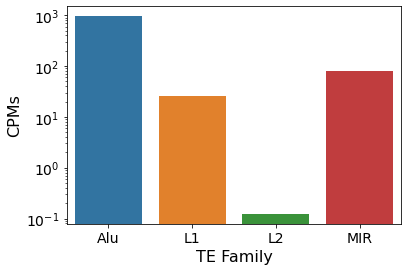

In [35]:
import seaborn as sns
sns.barplot(data=count_df.groupby(['family_id']).sum(), x=count_df.groupby(['family_id']).sum().index, y="CPM")
#increase size of labels
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.xlabel('TE Family', fontsize=16)
plt.ylabel('CPMs', fontsize=16)
#make yaxis log scale
plt.yscale('log')
plt.show()

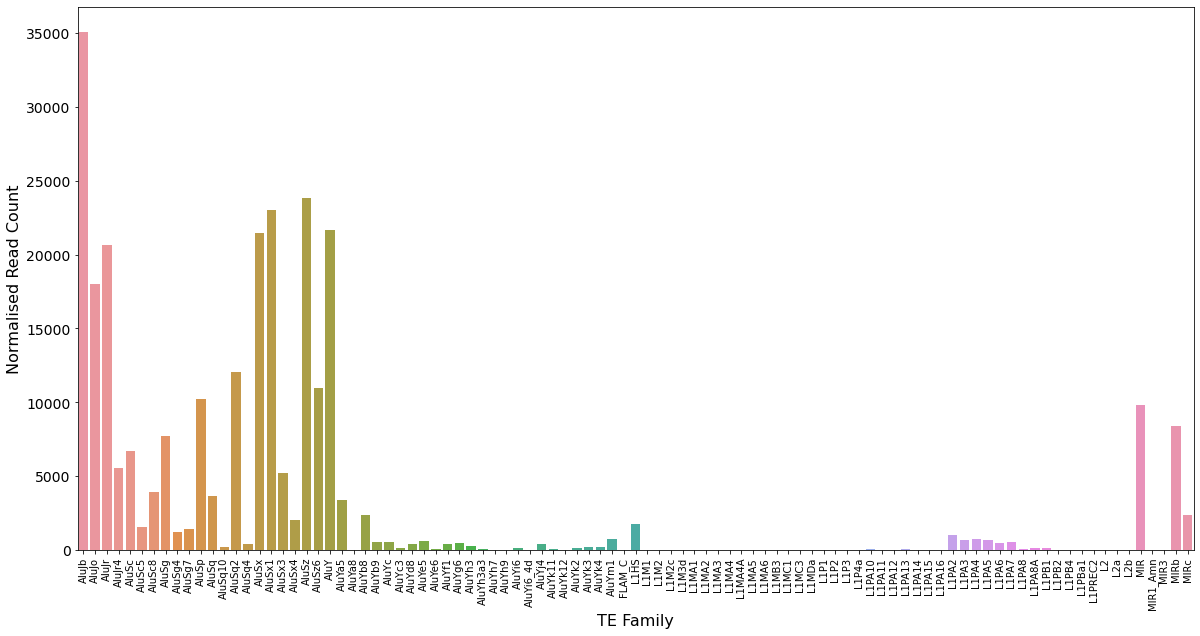

In [7]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=count_df.groupby(['gene_id']).sum(), x=count_df.groupby(['gene_id']).sum().index, y="Count")
#increase size of labels
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('TE Family', fontsize=16)
plt.ylabel('Normalised Read Count', fontsize=16)
#make yaxis log scale
#plt.yscale('log')
plt.show()

In [187]:
#Subset LINEs - order by evolutionary age
line = count_df[count_df['class_id'] == 'LINE']
line

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id,Count,CPM
50991,chr1,172314246,172314266,+,L1PA3_dup529,L1PA3,L1,LINE,1.0,0.003852
46458,chr1,149293675,149293695,+,L1PA5_dup419,L1PA5,L1,LINE,1.0,0.003852
62303,chr1,243807047,243807067,+,L1PA5_dup728,L1PA5,L1,LINE,1.0,0.003852
45078,chr1,118852351,118852371,+,L1HS_dup62,L1HS,L1,LINE,1.0,0.003852
63269,chr1,248761641,248761661,+,L1PA3_dup759,L1PA3,L1,LINE,1.0,0.003852
...,...,...,...,...,...,...,...,...,...,...
489957,chrY,5612179,5612199,-,L1HS_dup1111,L1HS,L1,LINE,1.0,0.003852
489957,chrY,5612179,5612199,-,L1HS_dup1111,L1HS,L1,LINE,1.0,0.003852
489957,chrY,5612179,5612199,-,L1HS_dup1111,L1HS,L1,LINE,1.0,0.003852
489957,chrY,5612179,5612199,-,L1HS_dup1111,L1HS,L1,LINE,1.0,0.003852


In [207]:
#Load in evol age csv
evol_age = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv', sep=',', header=0)
evol_age

,family,element,age
0,LINE,L1PA3,0.036821
1,LINE,L1PA5,0.058144
2,LINE,L1HS,0.020472
3,LINE,L1PA6,0.075453
4,LINE,L1PA7,0.084113
...,...,...,...
90,SINE,AluYk12,0.078529
91,SINE,FLAM_C,0.185532
92,SINE,MIR1_Amn,0.358442
93,SINE,AluYh7,0.125251


In [309]:
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'LINE']['age'].values, evol_age[evol_age['family'] == 'LINE']['element'].values)

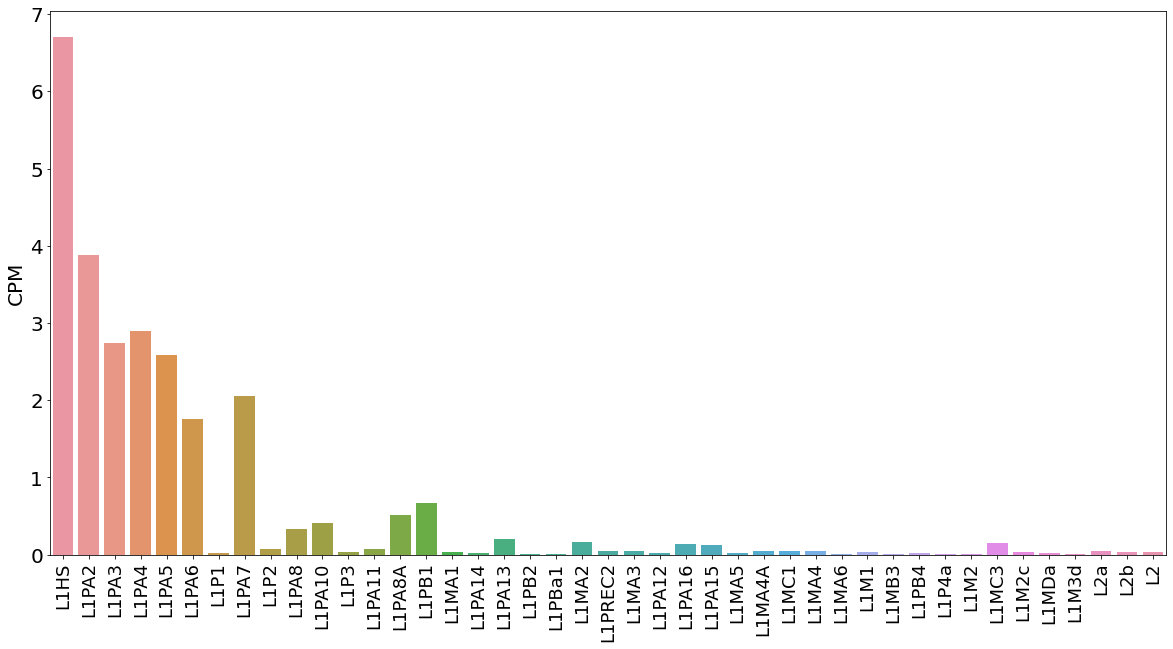

In [311]:
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'LINE']['age'].values, evol_age[evol_age['family'] == 'LINE']['element'].values)
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=line.groupby(['gene_id']).sum(), x=line.groupby(['gene_id']).sum().index, y="CPM", order=sort_name)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('CPM', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.show()

In [240]:
def counts_vs_age(sum_df, evol_df):
    counts,age = [],[]
    for l in sum_df.index:
        counts.append(sum_df.loc[l]['CPM'])
        age.append(evol_df[evol_df['element'] == l]['age'].values[0])
    return(counts,age)


In [312]:
sum_df = line.groupby(['gene_id']).sum()
counts, age = counts_vs_age(sum_df, evol_age)

In [313]:
#do pearsons correlation on age vs counts
from scipy.stats import pearsonr
corr, _ = pearsonr(age, counts)
print('Pearsons correlation: %.3f' % corr)
print(_)

Pearsons correlation: -0.540
0.00018311983681745277


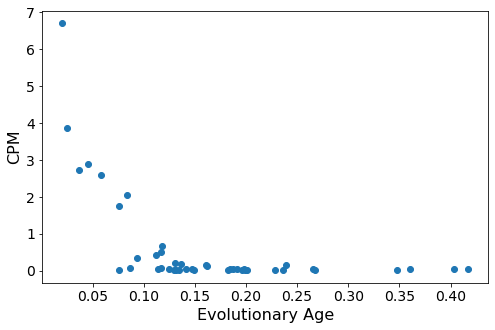

In [328]:
from scipy.stats import linregress

fig,ax = plt.subplots(figsize=(8,5))
plt.scatter(age, counts)
# line_fit=linregress(age, counts)
# xseq = np.linspace(0, 0.4, num=10)
# plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)

plt.xlabel('Evolutionary Age', fontsize=16)
plt.ylabel('CPM', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.show()

In [329]:
#Subset SINEs - order by evolutionary age
sine = count_df[count_df['class_id'] == 'SINE']
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'SINE']['age'].values, evol_age[evol_age['family'] == 'SINE']['element'].values)

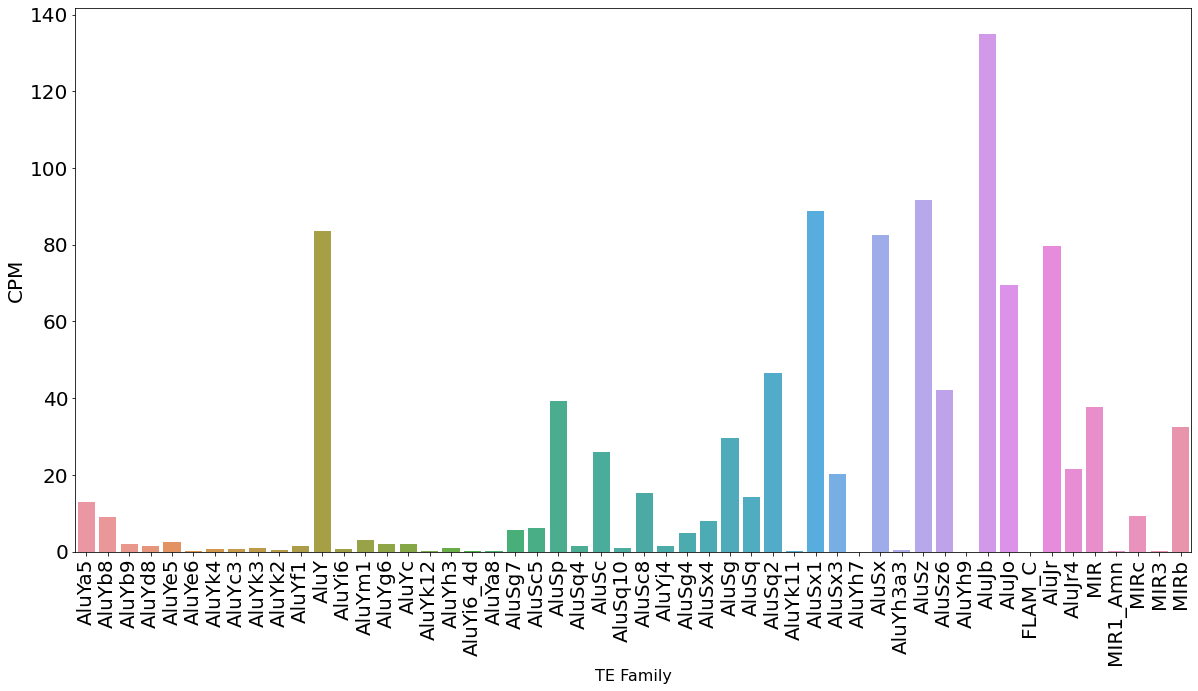

In [331]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sine.groupby(['gene_id']).sum(), x=sine.groupby(['gene_id']).sum().index, y="CPM", order=sort_name)
#increase size of labels
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('TE Family', fontsize=16)
plt.ylabel('CPM', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.show()

In [332]:
sum_df = sine.groupby(['gene_id']).sum()
counts, age = counts_vs_age(sum_df, evol_age)

In [333]:
#do pearsons correlation on age vs counts
from scipy.stats import pearsonr
corr, _ = pearsonr(age, counts)
print('Pearsons correlation: %.3f' % corr)
print(_)

Pearsons correlation: 0.182
0.19731264874412457


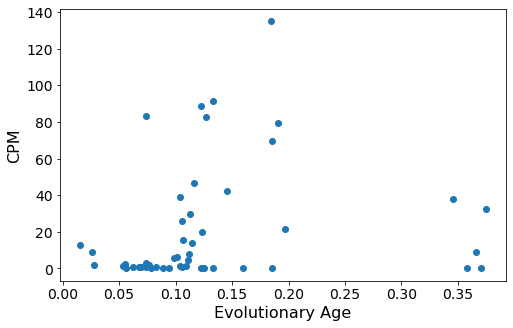

In [334]:
from scipy.stats import linregress

fig,ax = plt.subplots(figsize=(8,5))
plt.scatter(age, counts)
# line_fit=linregress(age, counts)
# xseq = np.linspace(0, 0.4, num=10)
# plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)

plt.xlabel('Evolutionary Age', fontsize=16)
plt.ylabel('CPM', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.show()

In [254]:
#Compare with TET
#Load TE transcripts output
#TET_counts = pd.read_csv('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/TET.cntTable', sep="\t", header=0)
TET_counts


,gene/TE,./Aligned.sortedByCoord.out.bam
0,ENSG00000000003.15,58
1,ENSG00000000005.6,8
2,ENSG00000000419.13,457
3,ENSG00000000457.14,827
4,ENSG00000000460.17,383
...,...,...
61827,Zaphod2:hAT-Tip100:DNA,2850
61828,Zaphod3:hAT-Tip100:DNA,5800
61829,Zaphod:hAT-Tip100:DNA,7564
61830,hAT-16_Crp:hAT-Charlie:DNA,191


In [335]:
l_unq = line['gene_id'].unique()
dict = {'element':[], 'counts':[], 'type':[]}
dict, l_unq

({'element': [], 'counts': [], 'type': []},
 array(['L1PA3', 'L1PA5', 'L1HS', 'L1PA6', 'L1PA7', 'L1PB1', 'L1PA4',
        'L1PA10', 'L1PA2', 'L1MA5', 'L1MA4', 'L1PA15', 'L1MA2', 'L1PA8',
        'L1PA13', 'L1PA16', 'L1MA4A', 'L1P3', 'L1PA11', 'L2', 'L1PA8A',
        'L1M2', 'L2a', 'L1P2', 'L1PA12', 'L1PREC2', 'L1MC3', 'L1P4a',
        'L1PA14', 'L1M3d', 'L1MA3', 'L2b', 'L1MA6', 'L1MA1', 'L1P1',
        'L1M2c', 'L1MC1', 'L1M1', 'L1MDa', 'L1PB4', 'L1PB2', 'L1PBa1',
        'L1MB3'], dtype=object))

In [336]:
for l in l_unq:
    dict['element'].append(l)
    dict['counts'].append(line[line['gene_id']==l]['Count'].sum())
    dict['type'].append('5p_filter')

In [337]:
for l in l_unq:
    dict['element'].append(l)
    dict['type'].append('TET')
    tet_count = TET_counts[[l in TET_counts['gene/TE'].values[i] for i in range(len(TET_counts['gene/TE'].values))]]['./Aligned.sortedByCoord.out.bam'].values[0]
    dict['counts'].append(tet_count)

In [338]:
df = pd.DataFrame(dict)
df

,element,counts,type
0,L1PA3,711.133333,5p_filter
1,L1PA5,670.000000,5p_filter
2,L1HS,1740.283333,5p_filter
3,L1PA6,455.000000,5p_filter
4,L1PA7,533.000000,5p_filter
...,...,...,...
81,L1MDa,102030.000000,TET
82,L1PB4,80144.000000,TET
83,L1PB2,30136.000000,TET
84,L1PBa1,11352.000000,TET


In [339]:
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'LINE']['age'].values, evol_age[evol_age['family'] == 'LINE']['element'].values)

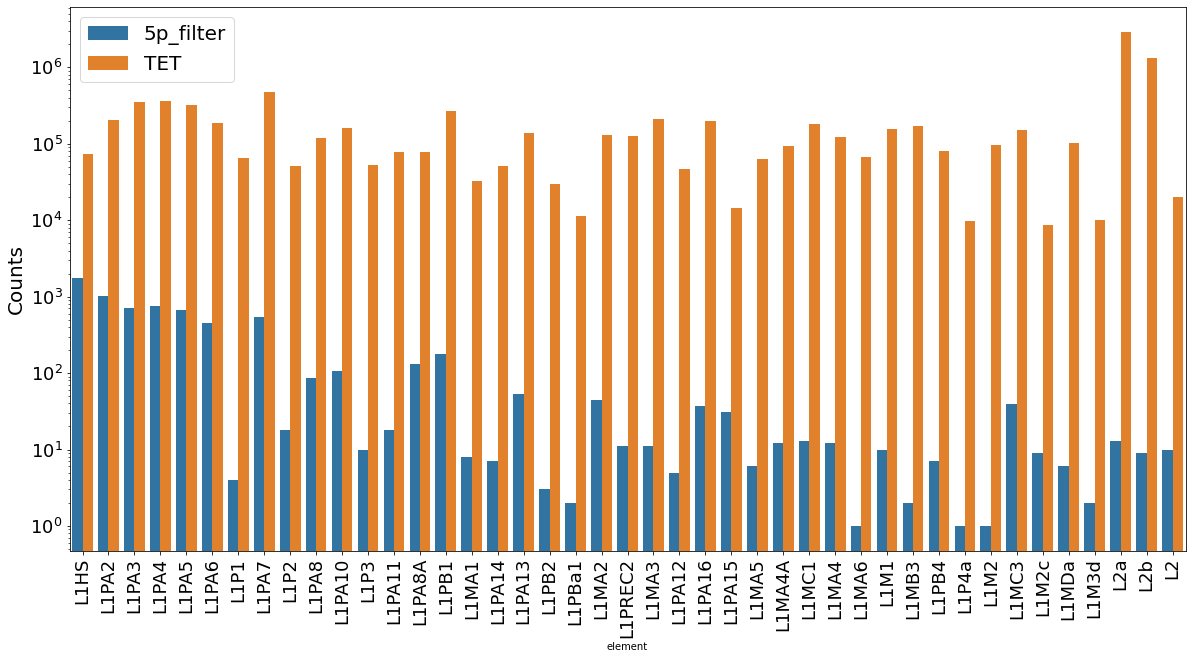

In [341]:
#Plot jointly on bar plot
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='element', y="counts", hue='type', order=sort_name)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.ylabel('Counts', fontsize=20)
plt.legend(fontsize=20)
#make log scaled y axies
plt.yscale('log')
plt.show()

In [342]:
s_unq = sine['gene_id'].unique()
dict = {'element':[], 'counts':[], 'type':[]}
dict, s_unq

({'element': [], 'counts': [], 'type': []},
 array(['AluJo', 'AluSx1', 'MIR', 'AluSz', 'AluSx3', 'AluY', 'AluJb',
        'AluJr4', 'AluYb8', 'AluSp', 'AluSx', 'AluYc3', 'AluSz6', 'AluSg7',
        'MIRb', 'AluSc', 'AluYi6', 'AluSc8', 'AluSg', 'AluSq2', 'AluYa5',
        'AluJr', 'AluSq', 'AluYm1', 'MIRc', 'AluYh3', 'AluSc5', 'AluYg6',
        'AluSx4', 'AluYe5', 'AluYb9', 'AluSg4', 'AluSq4', 'AluYk3',
        'AluYc', 'AluYk11', 'AluYd8', 'AluYj4', 'AluYk4', 'AluYe6',
        'AluYf1', 'AluYh3a3', 'MIR3', 'AluSq10', 'AluYk2', 'AluYa8',
        'AluYi6_4d', 'AluYk12', 'FLAM_C', 'MIR1_Amn', 'AluYh7', 'AluYh9'],
       dtype=object))

In [343]:
for l in s_unq:
    dict['element'].append(l)
    dict['counts'].append(sine[sine['gene_id']==l]['Count'].sum())
    dict['type'].append('5p_filter')
    
for l in s_unq:
    dict['element'].append(l)
    dict['type'].append('TET')
    tet_count = TET_counts[[l in TET_counts['gene/TE'].values[i] for i in range(len(TET_counts['gene/TE'].values))]]['./Aligned.sortedByCoord.out.bam'].values[0]
    dict['counts'].append(tet_count)

In [344]:
df = pd.DataFrame(dict)
df

,element,counts,type
0,AluJo,18036.585348,5p_filter
1,AluSx1,23034.683333,5p_filter
2,MIR,9808.000000,5p_filter
3,AluSz,23809.615476,5p_filter
4,AluSx3,5223.016667,5p_filter
...,...,...,...
99,AluYk12,673.000000,TET
100,FLAM_C,116100.000000,TET
101,MIR1_Amn,67775.000000,TET
102,AluYh7,340.000000,TET


In [345]:
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'SINE']['age'].values, evol_age[evol_age['family'] == 'SINE']['element'].values)

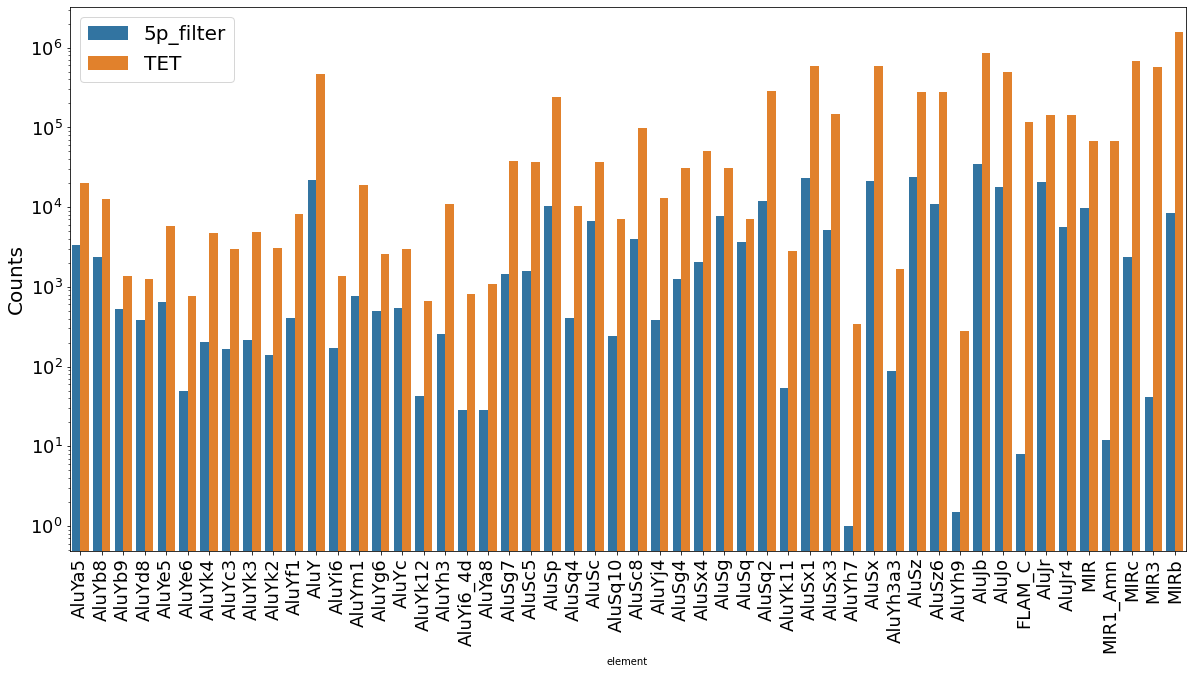

In [346]:
#Plot jointly on bar plot
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='element', y="counts", hue='type', order=sort_name)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.ylabel('Counts', fontsize=20)
plt.legend(fontsize=20)
#make log scaled y axies
plt.yscale('log')
plt.show()

In [ ]:
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'LINE']['age'].values, evol_age[evol_age['family'] == 'LINE']['element'].values)

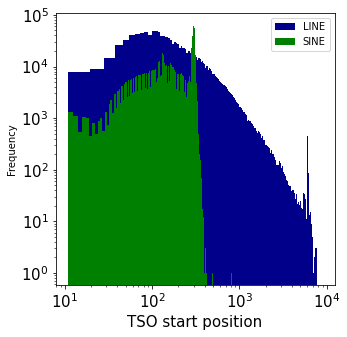

In [122]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(L_length, bins=1000, color='darkblue', label='LINE')
plt.hist(S_length, bins=500, color='green', label='SINE')

plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 10})
plt.xscale('log')
plt.yscale('log')
plt.savefig(s_fig + '/TE_lengths.svg', transparent=True)
plt.show()

In [ ]:
# Filter by insertion size
filt_prac1 = prac1[index]
filt_prac1

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,100206088,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,100604384,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,100638390,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,100669120,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,100682490,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,9288557,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,9947151,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,9967750,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,9980574,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


In [ ]:
#Convert End values to Start + shift
nbase_shift = 20
filt_prac1['End']=filt_prac1['Start'] + nbase_shift
filt_prac1

/tmp/ipykernel_2369450/3127570340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_prac1['End']=filt_prac1['Start'] + nbase_shift


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,100199622,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,100598258,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,100632258,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,100663001,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,100676946,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,9280876,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,9941150,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,9961634,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,9973857,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,0,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,0,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,0,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,0,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,0,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,0,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,0,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,0,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,0,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


# TE RNA over lifespan

### Psychencode Bulk

In [3]:
# Metadata
meta = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/PEC_RNAmeta.csv')
ev_df = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv')
meta

,Sample ID,Cell Type,RIN,Bulk tissue RNA RIN#,RNAseq Library Prep Date Date,batch,Brain Bank,DISORDER,CDEATHOFF,AGEYEARS,AGEDAYS,sex,race,Brain PH,PMI Hours,sample,period
0,1105,GABA,6.5,9.1,3/25/2022,20,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,16,341.0,Male,White,5.13,17.0,1105-GABA,adolescence
1,1105,GLU,6.2,9.1,3/25/2022,20,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,16,341.0,Male,White,5.13,17.0,1105-GLU,adolescence
2,1133,GABA,5.8,9.1,11/15/2021,4,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cocaine intoxication,38,178.0,Male,White,5.45,9.0,1133-GABA,adulthood
3,1133,GLU,5.7,9.1,11/15/2021,4,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cocaine intoxication,38,178.0,Male,White,5.45,9.0,1133-GLU,adulthood
4,1134,GABA,5.3,8.9,2/16/2022,14,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,ASCVD (Arteriosclerotic Cardiovascular Disease),41,252.0,Male,White,5.89,15.0,1134-GABA,adulthood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Hct17HEIA010,GLU,4.2,9.6,3/10/2022,17,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Complications of Treatment for Food Asphyxia,3,70.0,Female,White,6.45,14.2,Hct17HEIA010-GLU,earlychildhood
112,HctYPA008,GABA,2.3,9.4,3/22/2022,19,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Coronary Artery Disease; Aortic Valve Replacem...,75,193.0,Male,White,6.21,14.2,HctYPA008-GABA,lateadulthood
113,HctYPA008,GLU,2.2,9.4,3/22/2022,19,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Coronary Artery Disease; Aortic Valve Replacem...,75,193.0,Male,White,6.21,14.2,HctYPA008-GLU,lateadulthood
114,HctZZNA014,GABA,3.8,8.7,4/1/2022,21,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Cardiac Tamponade; Lg Pericardial Effusion; Co...,39,68.0,Female,White,6.22,21.7,HctZZNA014-GABA,adulthood


In [4]:
ID_l = meta['sample'].values
ID_l

array(['1105-GABA', '1105-GLU', '1133-GABA', '1133-GLU', '1134-GABA',
       '1134-GLU', '1275-GABA', '1275-GLU', '1277-GABA', '1277-GLU',
       '1535-GLU', '1539-GABA', '1539-GLU', '1648-GABA', '1648-GLU',
       '1823-GABA', '1823-GLU', '1848-GABA', '1848-GLU', '3739-GLU',
       '4321-GABA', '4321-GLU', '4332-GABA', '4332-GLU', '4337-GABA',
       '4337-GLU', '4369-GABA', '4369-GLU', '4379-GABA', '4379-GLU',
       '4411-GABA', '4411-GLU', '4414-GABA', '4414-GLU', '4425-GABA',
       '4425-GLU', '4428-GABA', '4428-GLU', '4545-GABA', '4545-GLU',
       '4725-GABA', '4725-GLU', '5077-GABA', '5077-GLU', '5086-GABA',
       '5086-GLU', '5161-GABA', '5161-GLU', '5184-GABA', '5184-GLU',
       '5293-GABA', '5293-GLU', '5309-GABA', '5309-GLU', '5326-GABA',
       '5326-GLU', '5387-GABA', '5387-GLU', '5401-GABA', '5401-GLU',
       '5446-GABA', '5446-GLU', '5451-GABA', '5451-GLU', '5570-GABA',
       '5570-GLU', '5606-GABA', '5606-GLU', '5617-GABA', '5617-GLU',
       '5643-GABA', '5643-GL

In [27]:
#Load in PE data for each sample
ID_l = meta['sample'].values
parent_path = '/cndd3/dburrows/DATA/te/rna/PE.counts/ATEM/'
te = ev_df['element'].values
dict = {'element':te}
for ID in ID_l:
    te_v = ter.load_ATEM_family(parent_path + '/Sample_' + ID + '/ATEM_counts.csv', te)
    assert len(te) == len(te_v), 'Error: Not all TE elements were counted'
    #Add to dict
    dict[ID] = te_v
df = pd.DataFrame(dict)
#set first column to index
df.set_index('element', inplace=True)
df = df.astype(int)

#write to csv
df.to_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/ATEM_counts.csv')

,1105-GABA,1105-GLU,1133-GABA,1133-GLU,1134-GABA,1134-GLU,1275-GABA,1275-GLU,1277-GABA,1277-GLU,...,Hct16HCQA020-GABA,Hct16HCQA020-GLU,Hct16HECA028-GABA,Hct16HECA028-GLU,Hct17HEIA010-GABA,Hct17HEIA010-GLU,HctYPA008-GABA,HctYPA008-GLU,HctZZNA014-GABA,HctZZNA014-GLU
element,,,,,,,,,,,,,,,,,,,,,
L1PA3,1.542017,1.484793,2.463484,2.702740,1.987490,2.106243,2.927207,2.299872,1.787540,2.392764,...,1.929103,2.122900,1.931179,1.936528,2.178055,2.204226,2.609185,2.603009,2.337986,2.877993
L1PA5,1.785156,1.684069,2.779063,2.618366,2.568648,1.959117,2.775716,1.778633,1.843781,2.502789,...,2.906770,2.500812,2.207290,2.446516,2.762037,2.368078,3.743994,2.885471,3.075447,2.846685
L1HS,2.419374,1.704109,5.314839,5.459406,3.508488,3.689945,5.173601,3.979074,3.019363,4.825171,...,4.107843,3.784782,3.951381,3.868657,2.846826,3.883866,3.791318,4.109962,3.802146,6.141008
L1PA6,0.996056,0.914763,1.262237,1.526291,1.162856,1.132153,1.457417,0.644755,1.024674,1.299075,...,1.235521,1.342902,1.088198,1.191161,1.496104,1.396410,1.908477,1.635936,1.583734,1.577634
L1PA7,1.062816,1.423324,1.757139,1.814316,1.511065,1.450469,2.073507,1.491458,1.287168,1.633740,...,1.480618,1.229280,1.666624,1.433672,1.546269,1.716420,1.670397,1.776446,1.674141,1.697210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AluYk12,0.129514,0.180259,0.350317,0.259997,0.397876,0.149860,0.134149,0.108694,0.096459,0.597899,...,0.280930,0.272349,0.200418,0.201499,0.383124,0.139447,0.122240,0.095458,0.254000,0.271618
FLAM_C,0.002670,0.004849,0.004759,0.037758,0.012957,0.009845,0.003312,0.018527,0.022138,0.010796,...,0.011467,0.010277,0.006866,0.010699,0.002951,0.003879,0.007680,0.003345,0.016144,0.007715
MIR1_Amn,0.018693,0.006465,0.002379,0.017427,0.029152,0.003282,0.016562,0.025938,0.028463,0.007197,...,0.008600,0.006852,0.006866,0.014265,0.014754,0.003879,0.003840,0.003345,0.012915,0.007715


In [86]:
# make design matrix 
# only keep some columns in meta
dm = meta[['Cell Type', 'sex', 'race', 'AGEYEARS']]
dm['race'][dm['race'] !='White'] = 'Black'
age_ = dm['AGEYEARS'].values
new_age = (age_ - np.mean(age_))/np.std(age_)
dm['AGEYEARS'] = new_age
dm.index = meta['sample'].values
dm.to_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/ATEM_design.csv')

/var/tmp/ipykernel_988003/3475479402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['race'][dm['race'] !='White'] = 'Black'
/var/tmp/ipykernel_988003/3475479402.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['AGEYEARS'] = new_age


,Cell Type,sex,race,AGEYEARS
1105-GABA,GABA,Male,White,-0.491468
1105-GLU,GLU,Male,White,-0.491468
1133-GABA,GABA,Male,White,0.480801
1133-GLU,GLU,Male,White,0.480801
1134-GABA,GABA,Male,White,0.613383
...,...,...,...,...
Hct17HEIA010-GLU,GLU,Female,White,-1.065991
HctYPA008-GABA,GABA,Male,White,2.115981
HctYPA008-GLU,GLU,Male,White,2.115981
HctZZNA014-GABA,GABA,Female,White,0.524995


In [5]:
#Load in CPMS
df = pd.read_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/ATEM_CPM.csv', index_col=0)

#Load in DESEQ2 results
age_res = pd.read_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/DESEQ_age.csv', index_col=0)
cell_res = pd.read_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/DESEQ_cell.csv', index_col=0)
sex_res = pd.read_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/DESEQ_sex.csv', index_col=0)
race_res = pd.read_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/DESEQ_race.csv', index_col=0)


In [ ]:
#######
#AGE
#######

In [94]:
age_res['geneid'] = age_res.index
age_res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,geneid
L1PA3,684.236024,0.001709,0.020077,0.085126,0.932161,0.973136,L1PA3
L1PA5,739.871915,0.033541,0.023097,1.452163,0.146456,0.479771,L1PA5
L1HS,1301.311557,-0.017488,0.032150,-0.543928,0.586491,0.785265,L1HS
L1PA6,374.712410,0.055358,0.029155,1.898761,0.057596,0.360417,L1PA6
L1PA7,472.124195,0.023063,0.019431,1.186886,0.235273,0.601867,L1PA7
...,...,...,...,...,...,...,...
AluYk12,67.902751,-0.248245,0.067740,-3.664664,0.000248,0.011764,AluYk12
FLAM_C,3.004916,0.051090,0.119096,0.428981,0.667937,0.857462,FLAM_C
MIR1_Amn,4.336755,-0.131075,0.100971,-1.298145,0.194238,0.542722,MIR1_Amn
AluYh7,31.173214,0.068319,0.128566,0.531390,0.595149,0.785265,AluYh7


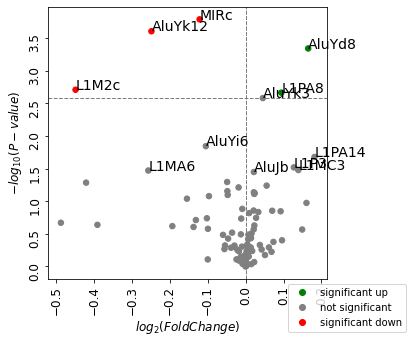

In [120]:
from bioinfokit import analys, visuz
age_res['geneid'] = age_res.index
normp_inadj = np.max(age_res['pvalue'][age_res['padj'] < 0.05])

# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=age_res, lfc='log2FoldChange', pv='pvalue', dim = (5,5), dotsize=30, 
                             geneid = 'geneid', genenames = tuple(age_res[age_res['pvalue'] < 0.05]['geneid'].values), 
                             valpha = 1,gstyle=1, sign_line=True
                             ,plotlegend=True, legendpos='upper right',
                             legendanchor=(1.30,0), pv_thr = (normp_inadj,normp_inadj), lfc_thr=(0,0), 
                             axtickfontsize=12, axlabelfontsize=12, gfont=14, figtype='svg', figname=s_fig + '/ATEM_PE_age', show=True)
                            

In [176]:
pos_df = df.iloc[np.where((age_res['padj'] < 0.05) & (age_res['log2FoldChange'] > 0))[0]]
neg_df = df.iloc[np.where((age_res['padj'] < 0.05) & (age_res['log2FoldChange'] < 0))[0]]

In [175]:
neg_df

,1105-GABA,1105-GLU,1133-GABA,1133-GLU,1134-GABA,1134-GLU,1275-GABA,1275-GLU,1277-GABA,1277-GLU,...,Hct16HCQA020-GABA,Hct16HCQA020-GLU,Hct16HECA028-GABA,Hct16HECA028-GLU,Hct17HEIA010-GABA,Hct17HEIA010-GLU,HctYPA008-GABA,HctYPA008-GLU,HctZZNA014-GABA,HctZZNA014-GLU
element,,,,,,,,,,,,,,,,,,,,,
L1M2c,0.013352,0.029091,0.011897,0.034853,0.000000,0.039379,0.013249,0.000000,0.012650,0.032387,...,0.000000,0.006852,0.000000,0.035663,0.008853,0.034910,0.003840,0.006691,0.000000,0.019286
MIRc,1.356559,1.331740,1.660776,1.452227,2.328950,1.676899,1.841645,2.141771,1.457947,1.432222,...,1.189654,0.955790,1.280434,1.333815,1.915131,1.815332,1.167358,1.124079,1.465882,1.539061
AluYk12,0.129514,0.180259,0.350317,0.259997,0.397876,0.149860,0.134149,0.108694,0.096459,0.597899,...,0.280930,0.272349,0.200418,0.201499,0.383124,0.139447,0.122240,0.095458,0.254000,0.271618


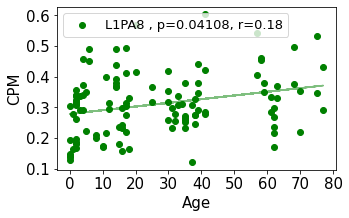

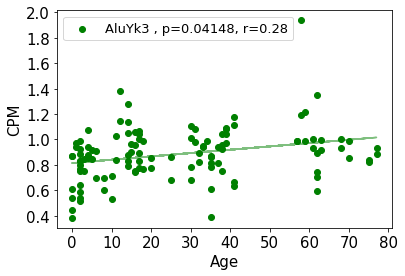

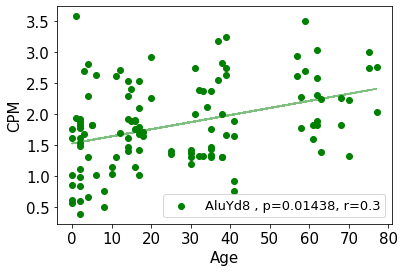

In [185]:
#Visualise up and down regulated genes with age
curr_df = pos_df
col = 'green'
#plot each plot as a panel on a subplot
fig,ax = plt.subplots(figsize=(5,3))
for x,c in enumerate(curr_df.index.values):
    plt.scatter(age, curr_df.loc[c].values, alpha=1, c=col, label=c + ' , p=' + np.round(age_res[age_res['padj'] < 0.05].loc[c]['padj'],5).astype(str) + ', r=' + np.round(stat[pval < 0.05][x],2).astype(str))
    #fit linear regression line to data
    slope, intercept, r_value, p_value, std_err = stats.linregress(age, curr_df.loc[c].values)
    plt.plot(age, intercept + slope*age, c=col, alpha=0.5)

    plt.legend(fontsize=13)
    plt.xlabel('Age', fontsize=15)
    plt.ylabel('CPM', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.savefig(s_fig + '/UP_ATEM_PE_age_scatter' + str(x)+'.svg', transparent=True)
    plt.show()


In [62]:
#Load in evolutionary age
evol_age = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv')



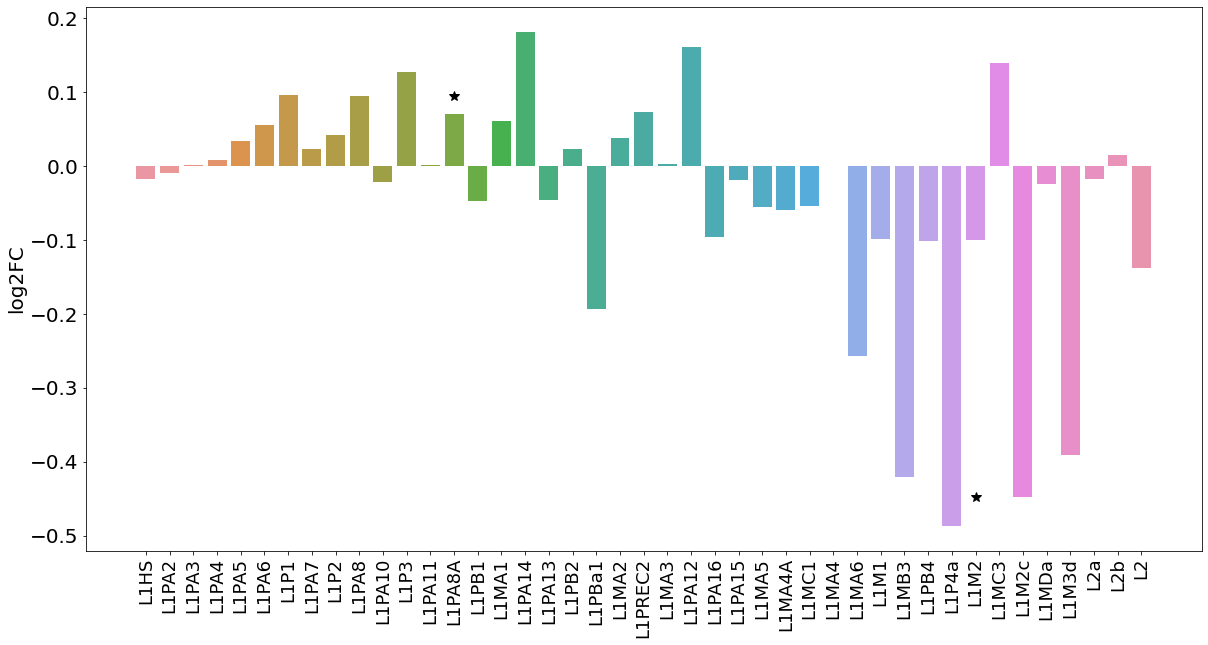

In [110]:
str_arg = 'LINE'
sub_ = age_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="log2FoldChange", order=sort_name)
# add * symbol above bars with p < 0.05
plt.plot(np.where(sub_['padj'] < 0.05)[0], sub_[sub_['padj'] < 0.05]['log2FoldChange'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('log2FC', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.savefig(s_fig + '/ATEM_PE_LINE_age_bar.svg', transparent=True)
plt.show()

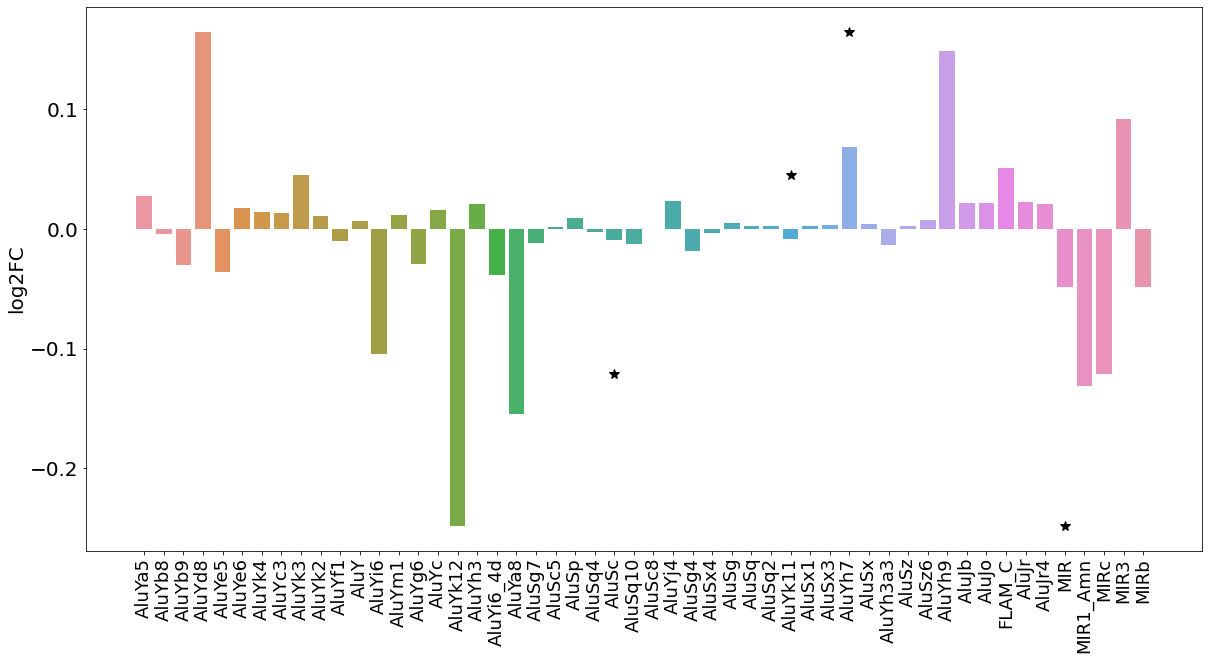

In [111]:
str_arg = 'SINE'
sub_ = age_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="log2FoldChange", order=sort_name)
# add * symbol above bars with p < 0.05
plt.plot(np.where(sub_['padj'] < 0.05)[0], sub_[sub_['padj'] < 0.05]['log2FoldChange'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('log2FC', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.savefig(s_fig + '/ATEM_PE_SINE_age_bar.svg', transparent=True)
plt.show()

In [101]:
# Calculate spearman's correlation for each subfamily
import scipy.stats as stats
import mne 
age = meta['AGEYEARS'].values
res = stats.spearmanr(np.reshape(age, (1,len(age))), np.asarray(df), axis=1)
stat = res.statistic[1:,0]
pval = res.pvalue[1:,0]

sig_v, adj_p_vals = mne.stats.fdr_correction(pval, 0.05, 'indep') #Use Benjamini hochberg FDR test 

spear_age_res = pd.DataFrame({'stat':stat, 'pval':pval, 'adj_pval':adj_p_vals}, index=df.index.values)
spear_age_res['geneid'] = spear_age_res.index
spear_age_res


,stat,pval,adj_pval,geneid
L1PA3,0.182499,0.049904,0.131690,L1PA3
L1PA5,0.282478,0.002124,0.033637,L1PA5
L1HS,0.067023,0.474701,0.570843,L1HS
L1PA6,0.303004,0.000946,0.024372,L1PA6
L1PA7,0.226553,0.014465,0.072324,L1PA7
...,...,...,...,...
AluYk12,-0.121594,0.193513,0.311588,AluYk12
FLAM_C,0.090433,0.334334,0.460314,FLAM_C
MIR1_Amn,-0.071876,0.443238,0.546852,MIR1_Amn
AluYh7,0.127373,0.173025,0.291192,AluYh7


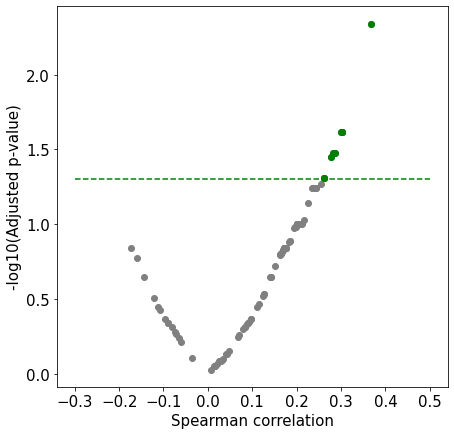

In [53]:
plt.subplots(figsize=(7,7))
plt.scatter(spear_age_res['stat'], -1*np.log10(spear_age_res['adj_pval']), c = 'grey')
plt.scatter(spear_age_res['stat'][spear_age_res['adj_pval'] < 0.05], -1*np.log10(spear_age_res['adj_pval'][spear_age_res['adj_pval'] < 0.05]), c = 'green')
#add horizontal red line at -log10(0.05)
plt.plot([-0.3,0.5], [-1*np.log10(0.05), -1*np.log10(0.05)], c='green', linestyle='--')
plt.ylabel('-log10(Adjusted p-value)', fontsize=15)
plt.xlabel('Spearman correlation', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(s_fig + '/ATEM_PE_age_spearman.svg', transparent=True)
plt.show()

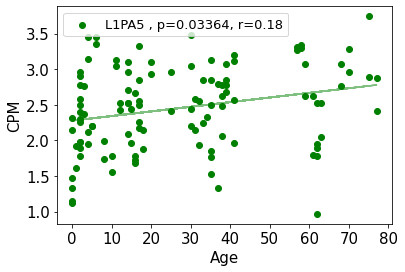

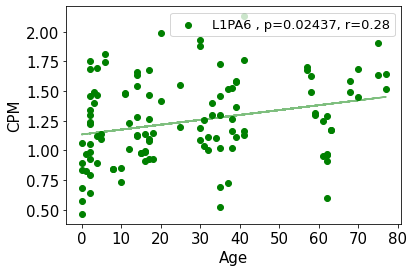

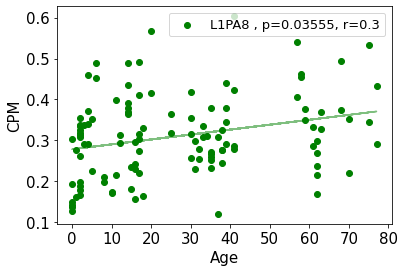

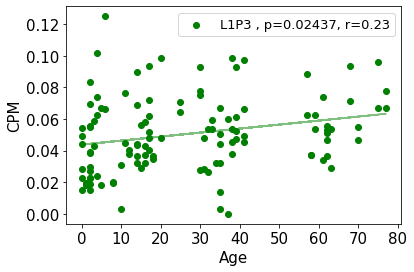

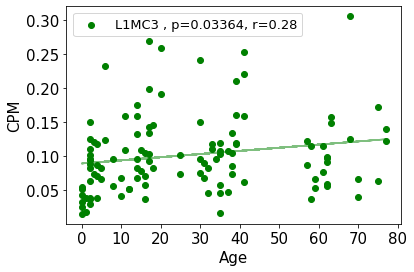

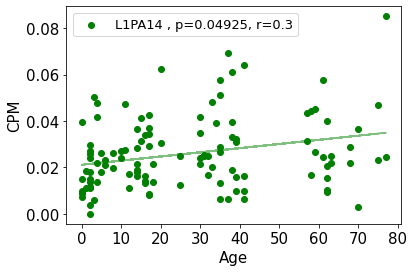

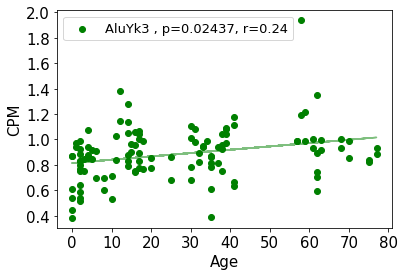

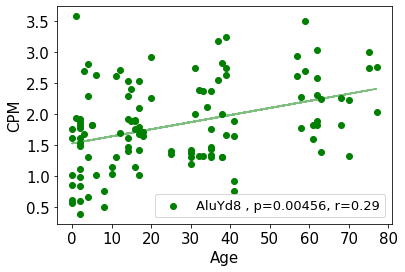

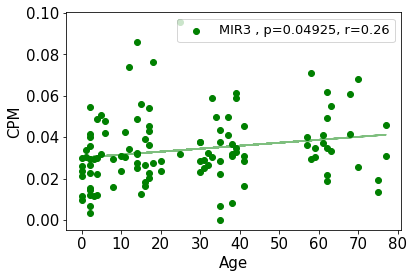

In [196]:
#Visualise up and down regulated genes with age
curr_df = df[sig_v]
col = 'green'
age=age

for x,c in enumerate(curr_df.index.values):
    plt.scatter(age, curr_df.loc[c].values, alpha=1, c=col, label=c + ' , p=' + np.round(adj_p_vals[sig_v][x],5).astype(str) + ', r=' + np.round(stat[pval < 0.05][x],2).astype(str))
    slope, intercept, r_value, p_value, std_err = stats.linregress(age, curr_df.loc[c].values)
    plt.plot(age, intercept + slope*age, c=col, alpha=0.5)

    plt.legend(fontsize=13)
    plt.xlabel('Age', fontsize=15)
    plt.ylabel('CPM', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.savefig(s_fig + '/UP_spearman_ATEM_PE_age_scatter' + str(x)+'.svg', transparent=True)
    plt.show()

In [ ]:
#Load in evolutionary age
evol_age = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv')


In [115]:
spear_age_res

,stat,pval,adj_pval,geneid
L1PA3,0.182499,0.049904,0.131690,L1PA3
L1PA5,0.282478,0.002124,0.033637,L1PA5
L1HS,0.067023,0.474701,0.570843,L1HS
L1PA6,0.303004,0.000946,0.024372,L1PA6
L1PA7,0.226553,0.014465,0.072324,L1PA7
...,...,...,...,...
AluYk12,-0.121594,0.193513,0.311588,AluYk12
FLAM_C,0.090433,0.334334,0.460314,FLAM_C
MIR1_Amn,-0.071876,0.443238,0.546852,MIR1_Amn
AluYh7,0.127373,0.173025,0.291192,AluYh7


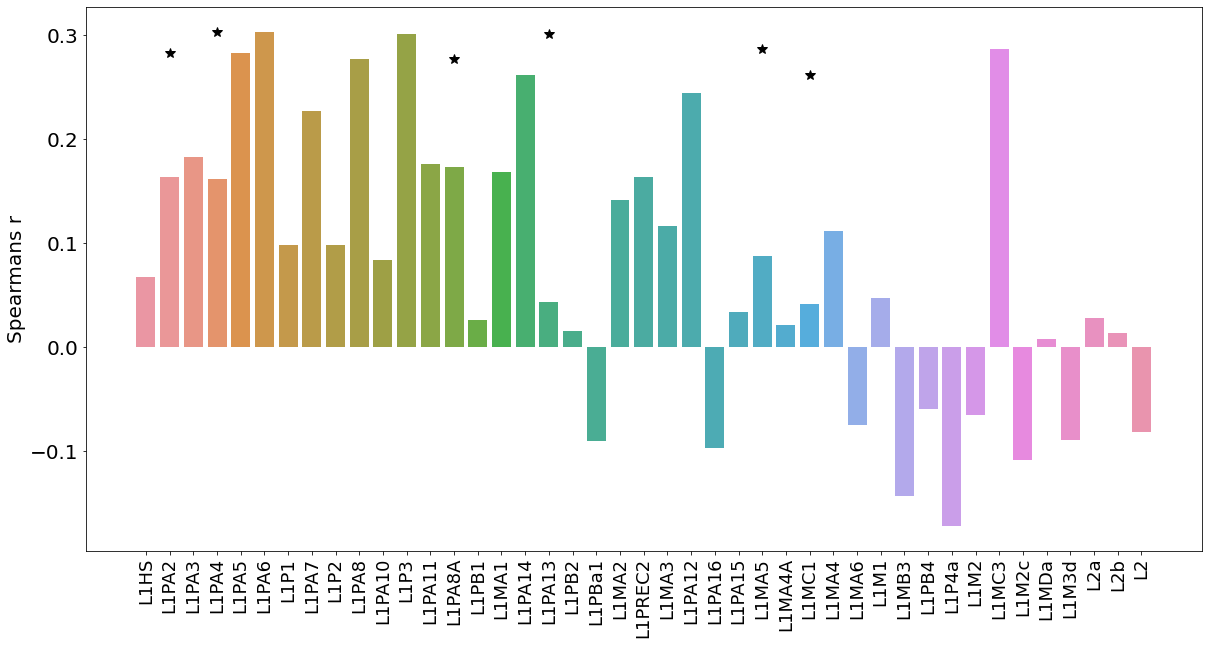

In [121]:
str_arg = 'LINE'
sub_ = spear_age_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="stat", order=sort_name)
# add * symbol above bars with p < 0.05
plt.plot(np.where(sub_['adj_pval'] < 0.05)[0], sub_[sub_['adj_pval'] < 0.05]['stat'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('Spearmans r', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.savefig(s_fig + '/ATEM_PE_LINE-spear_age_bar.svg', transparent=True)
plt.show()

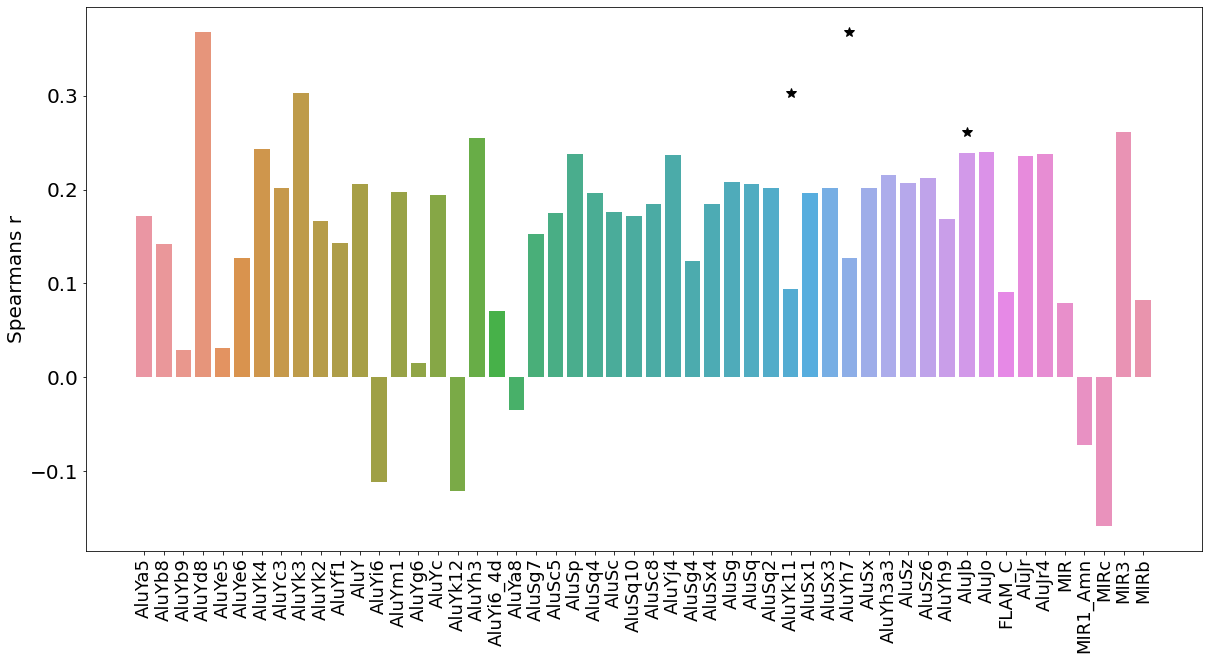

In [120]:
str_arg = 'SINE'
sub_ = spear_age_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="stat", order=sort_name)
# add * symbol above bars with p < 0.05
plt.plot(np.where(sub_['adj_pval'] < 0.05)[0], sub_[sub_['adj_pval'] < 0.05]['stat'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('Spearmans r', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.savefig(s_fig + '/ATEM_PE_SINE-spear_age_bar.svg', transparent=True)
plt.show()

In [122]:
##############
#CELL TYPE
##############
cell_res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
L1PA3,684.236024,0.067732,0.039471,1.715975,0.086167,0.224684
L1PA5,739.871915,-0.172809,0.045423,-3.804405,0.000142,0.001125
L1HS,1301.311557,-0.005254,0.063207,-0.083121,0.933755,0.953836
L1PA6,374.712410,-0.026022,0.057357,-0.453691,0.650051,0.735177
L1PA7,472.124195,0.029912,0.038203,0.782974,0.433642,0.614130
...,...,...,...,...,...,...
AluYk12,67.902751,-0.140173,0.132774,-1.055727,0.291093,0.515683
FLAM_C,3.004916,0.335055,0.235850,1.420627,0.155425,0.355006
MIR1_Amn,4.336755,-0.010088,0.196893,-0.051236,0.959137,0.959137
AluYh7,31.173214,-0.434702,0.252837,-1.719295,0.085561,0.224684


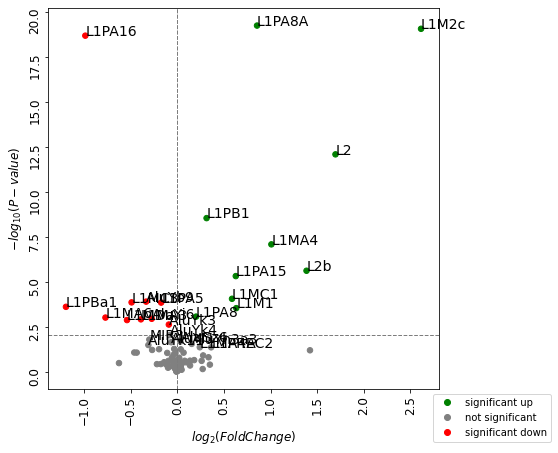

In [210]:
from bioinfokit import analys, visuz
cell_res['geneid'] = cell_res.index
normp_inadj = np.max(cell_res['pvalue'][cell_res['padj'] < 0.05])

# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=cell_res, lfc='log2FoldChange', pv='pvalue', dim = (7,7), dotsize=30, 
                             geneid = 'geneid', genenames = tuple(cell_res[cell_res['pvalue'] < 0.05]['geneid'].values), 
                             valpha = 1,gstyle=1, sign_line=True
                             ,plotlegend=True, legendpos='upper right',
                             legendanchor=(1.30,0), pv_thr = (normp_inadj,normp_inadj), lfc_thr=(0,0), 
                             axtickfontsize=12, axlabelfontsize=12, gfont=14, figtype='svg', figname=s_fig + '/ATEM_PE_celltype', show=True)
                            

In [123]:
cell_res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
L1PA3,684.236024,0.067732,0.039471,1.715975,0.086167,0.224684
L1PA5,739.871915,-0.172809,0.045423,-3.804405,0.000142,0.001125
L1HS,1301.311557,-0.005254,0.063207,-0.083121,0.933755,0.953836
L1PA6,374.712410,-0.026022,0.057357,-0.453691,0.650051,0.735177
L1PA7,472.124195,0.029912,0.038203,0.782974,0.433642,0.614130
...,...,...,...,...,...,...
AluYk12,67.902751,-0.140173,0.132774,-1.055727,0.291093,0.515683
FLAM_C,3.004916,0.335055,0.235850,1.420627,0.155425,0.355006
MIR1_Amn,4.336755,-0.010088,0.196893,-0.051236,0.959137,0.959137
AluYh7,31.173214,-0.434702,0.252837,-1.719295,0.085561,0.224684


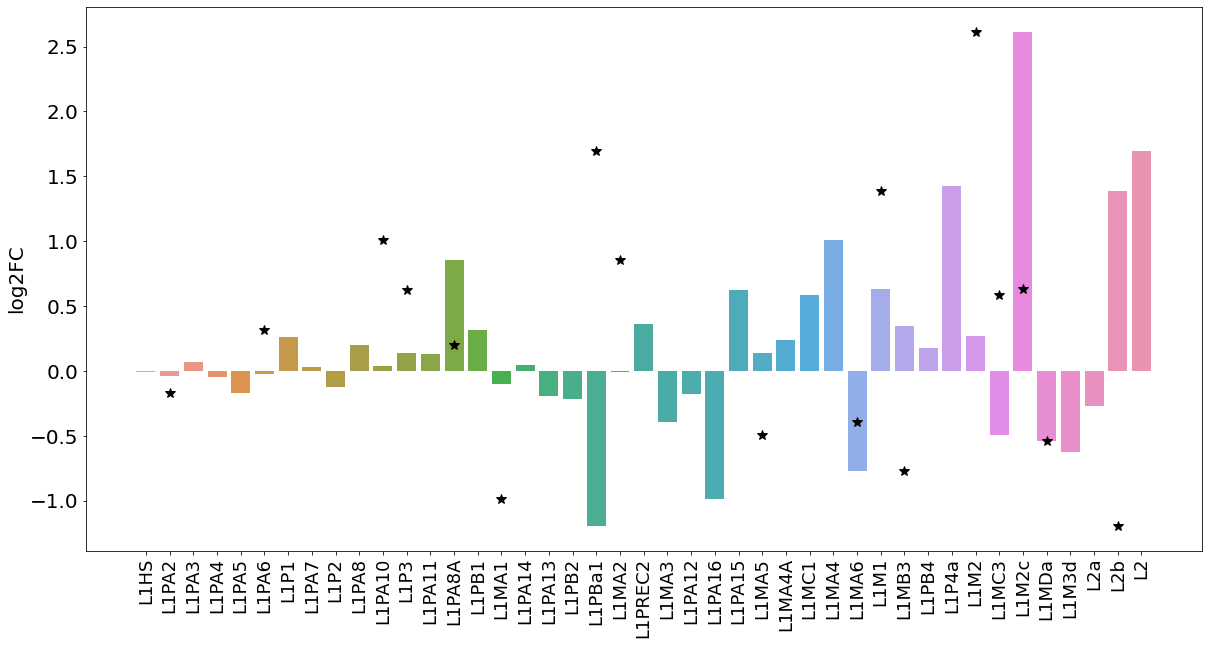

In [132]:
str_arg = 'LINE'
sub_ = cell_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="log2FoldChange", order=sort_name)
# add * symbol above bars with p < 0.05
plt.plot(np.where(sub_['padj'] < 0.05)[0], sub_[sub_['padj'] < 0.05]['log2FoldChange'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('log2FC', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
#add colorbar
plt.savefig(s_fig + '/ATEM_PE_LINE_celltype_bar.svg', transparent=True)
plt.show()

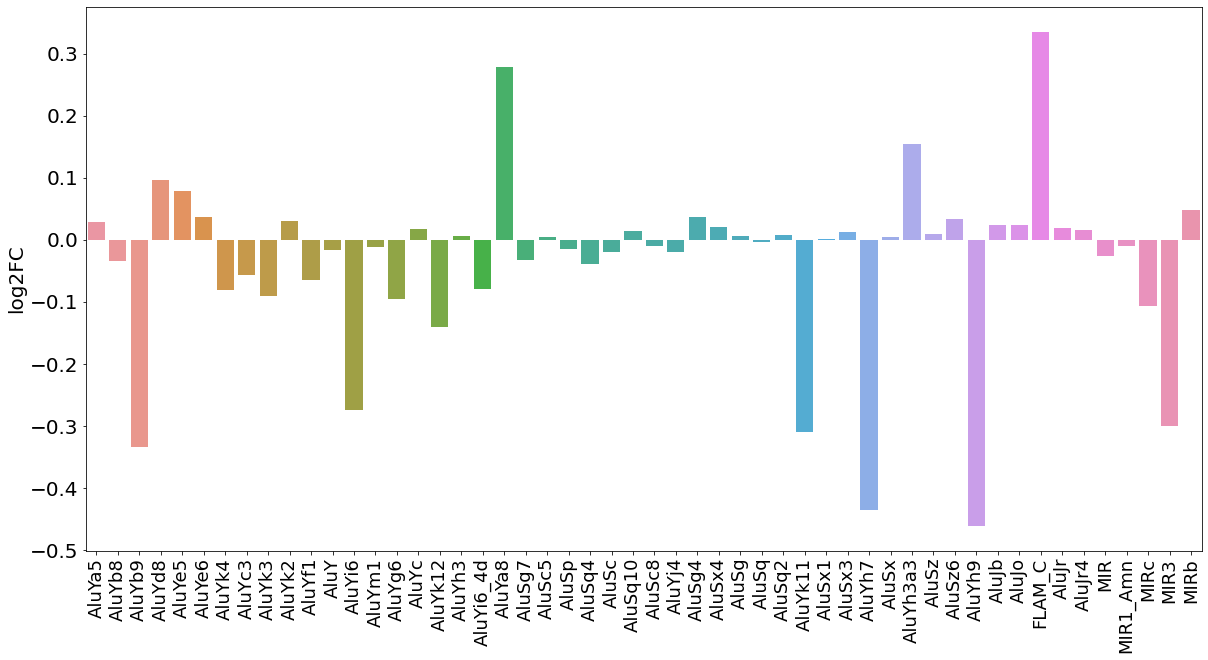

In [133]:
str_arg = 'SINE'
sub_ = cell_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="log2FoldChange", order=sort_name)
# add * symbol above bars with p < 0.05
#plt.plot(np.where(sub_['padj'] < 0.05)[0], sub_[sub_['padj'] < 0.05]['log2FoldChange'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('log2FC', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
#add colorbar
plt.savefig(s_fig + '/ATEM_PE_SINE_celltype_bar.svg', transparent=True)
plt.show()

In [147]:
glu_df = df.T.loc[glu_ind].T
glu_age = meta[glu_ind]['AGEYEARS'].values
gaba_df = df.T.loc[gaba_ind].T
gaba_age = meta[gaba_ind]['AGEYEARS'].values

In [148]:
line = ev_df['family'] == 'LINE'
line_df = glu_df.loc[line.values]
sine = ev_df['family'] == 'SINE'
sine_df = glu_df.loc[sine.values]

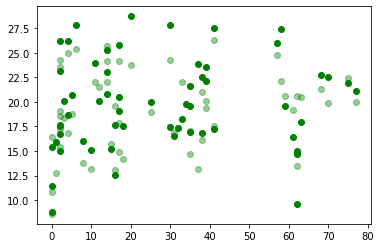

In [149]:
line = ev_df['family'] == 'LINE'
line_df = glu_df.loc[line.values]
sine = ev_df['family'] == 'SINE'
sine_df = glu_df.loc[sine.values]

plt.scatter(glu_age, np.sum(line_df).values, alpha=1, c='green', label='GLU LINE')
#plt.scatter(glu_age, np.sum(sine_df).values, alpha=1, c='blue', label='GLU SINE')

line_df = gaba_df.loc[line.values]
sine_df = gaba_df.loc[sine.values]
plt.scatter(gaba_age, np.sum(line_df).values, alpha=0.4, c='green', label='GABA LINE')
#plt.scatter(gaba_age, np.sum(sine_df).values, alpha=0.4, c='blue', label='GABA SINE')

plt.show()

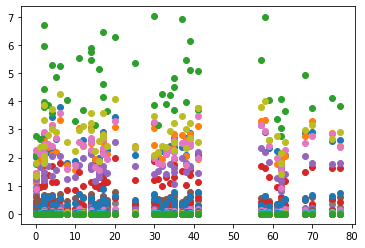

In [150]:
line = ev_df['family'] == 'LINE'
curr_df = glu_df.loc[line.values]
curr_age = glu_age

for i in range(len(curr_df)):
    plt.scatter(curr_age, curr_df.iloc[i].values, alpha=1)
plt.show()

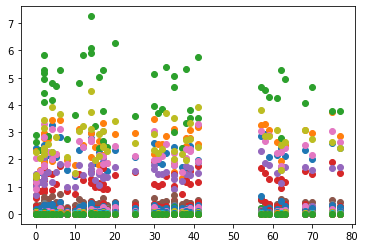

In [151]:
line = ev_df['family'] == 'LINE'
curr_df = gaba_df.loc[line.values]
curr_age = gaba_age
for i in range(len(curr_df)):
    plt.scatter(curr_age, curr_df.iloc[i].values, alpha=1)
plt.show()

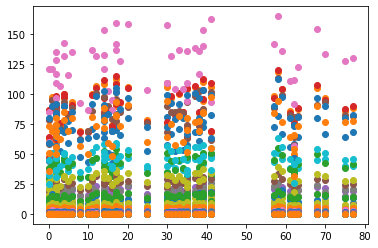

In [152]:
line = ev_df['family'] == 'SINE'
curr_df = glu_df.loc[line.values]
curr_age = glu_age

for i in range(len(curr_df)):
    plt.scatter(curr_age, curr_df.iloc[i].values, alpha=1)
plt.show()

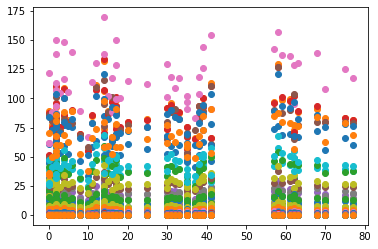

In [153]:
line = ev_df['family'] == 'SINE'
curr_df = gaba_df.loc[line.values]
curr_age = gaba_age
for i in range(len(curr_df)):
    plt.scatter(curr_age, curr_df.iloc[i].values, alpha=1)
plt.show()

### CZI single cell

In [134]:
# Metadata
meta = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/PEC_RNAmeta.csv')
ev_df = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv')
meta

,Sample ID,Cell Type,RIN,Bulk tissue RNA RIN#,RNAseq Library Prep Date Date,batch,Brain Bank,DISORDER,CDEATHOFF,AGEYEARS,AGEDAYS,sex,race,Brain PH,PMI Hours,sample,period
0,1105,GABA,6.5,9.1,3/25/2022,20,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,16,341.0,Male,White,5.13,17.0,1105-GABA,adolescence
1,1105,GLU,6.2,9.1,3/25/2022,20,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,16,341.0,Male,White,5.13,17.0,1105-GLU,adolescence
2,1133,GABA,5.8,9.1,11/15/2021,4,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cocaine intoxication,38,178.0,Male,White,5.45,9.0,1133-GABA,adulthood
3,1133,GLU,5.7,9.1,11/15/2021,4,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cocaine intoxication,38,178.0,Male,White,5.45,9.0,1133-GLU,adulthood
4,1134,GABA,5.3,8.9,2/16/2022,14,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,ASCVD (Arteriosclerotic Cardiovascular Disease),41,252.0,Male,White,5.89,15.0,1134-GABA,adulthood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Hct17HEIA010,GLU,4.2,9.6,3/10/2022,17,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Complications of Treatment for Food Asphyxia,3,70.0,Female,White,6.45,14.2,Hct17HEIA010-GLU,earlychildhood
112,HctYPA008,GABA,2.3,9.4,3/22/2022,19,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Coronary Artery Disease; Aortic Valve Replacem...,75,193.0,Male,White,6.21,14.2,HctYPA008-GABA,lateadulthood
113,HctYPA008,GLU,2.2,9.4,3/22/2022,19,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Coronary Artery Disease; Aortic Valve Replacem...,75,193.0,Male,White,6.21,14.2,HctYPA008-GLU,lateadulthood
114,HctZZNA014,GABA,3.8,8.7,4/1/2022,21,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Cardiac Tamponade; Lg Pericardial Effusion; Co...,39,68.0,Female,White,6.22,21.7,HctZZNA014-GABA,adulthood


In [135]:
ID_l = meta['sample'].values
ID_l

array(['1105-GABA', '1105-GLU', '1133-GABA', '1133-GLU', '1134-GABA',
       '1134-GLU', '1275-GABA', '1275-GLU', '1277-GABA', '1277-GLU',
       '1535-GLU', '1539-GABA', '1539-GLU', '1648-GABA', '1648-GLU',
       '1823-GABA', '1823-GLU', '1848-GABA', '1848-GLU', '3739-GLU',
       '4321-GABA', '4321-GLU', '4332-GABA', '4332-GLU', '4337-GABA',
       '4337-GLU', '4369-GABA', '4369-GLU', '4379-GABA', '4379-GLU',
       '4411-GABA', '4411-GLU', '4414-GABA', '4414-GLU', '4425-GABA',
       '4425-GLU', '4428-GABA', '4428-GLU', '4545-GABA', '4545-GLU',
       '4725-GABA', '4725-GLU', '5077-GABA', '5077-GLU', '5086-GABA',
       '5086-GLU', '5161-GABA', '5161-GLU', '5184-GABA', '5184-GLU',
       '5293-GABA', '5293-GLU', '5309-GABA', '5309-GLU', '5326-GABA',
       '5326-GLU', '5387-GABA', '5387-GLU', '5401-GABA', '5401-GLU',
       '5446-GABA', '5446-GLU', '5451-GABA', '5451-GLU', '5570-GABA',
       '5570-GLU', '5606-GABA', '5606-GLU', '5617-GABA', '5617-GLU',
       '5643-GABA', '5643-GL

In [ ]:
#Load in PE data for each sample
ID_l = meta['sample'].values
parent_path = '/cndd3/dburrows/DATA/te/rna/PE.counts/ATEM/'
te = ev_df['element'].values
dict = {'element':te}
for ID in ID_l:
    te_v = ter.load_ATEM_family(parent_path + '/Sample_' + ID + '/ATEM_counts.csv', te)
    assert len(te) == len(te_v), 'Error: Not all TE elements were counted'
    #Add to dict
    dict[ID] = te_v
df = pd.DataFrame(dict)
#set first column to index
df.set_index('element', inplace=True)
df = df.astype(int)

#write to csv
df.to_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/ATEM_counts.csv')

In [ ]:
# make design matrix 
# only keep some columns in meta
dm = meta[['Cell Type', 'sex', 'race', 'AGEYEARS']]
dm['race'][dm['race'] !='White'] = 'Black'
age_ = dm['AGEYEARS'].values
new_age = (age_ - np.mean(age_))/np.std(age_)
dm['AGEYEARS'] = new_age
dm.index = meta['sample'].values
dm.to_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/ATEM_design.csv')